In [41]:
%config IPCompleter.greedy = True
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

In [43]:
# Setup an example dataset
from sklearn.model_selection import train_test_split
n_samples, n_features = 14, 1
np.random.seed(5)
X = np.random.random_sample(n_samples) * 2 * np.pi - np.pi
X = X.reshape((-1,1))
y = np.sin(X) + (np.random.random_sample(n_samples)*0.1).reshape((-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

x_i = np.linspace(-np.pi, np.pi, 200)
x_i = x_i.reshape((-1, 1))
y_i = np.sin(x_i)
print('{} Training samples'.format(X_train.shape[0]))
print('{} Testing samples'.format(X_test.shape[0]))

9 Training samples
5 Testing samples


[]

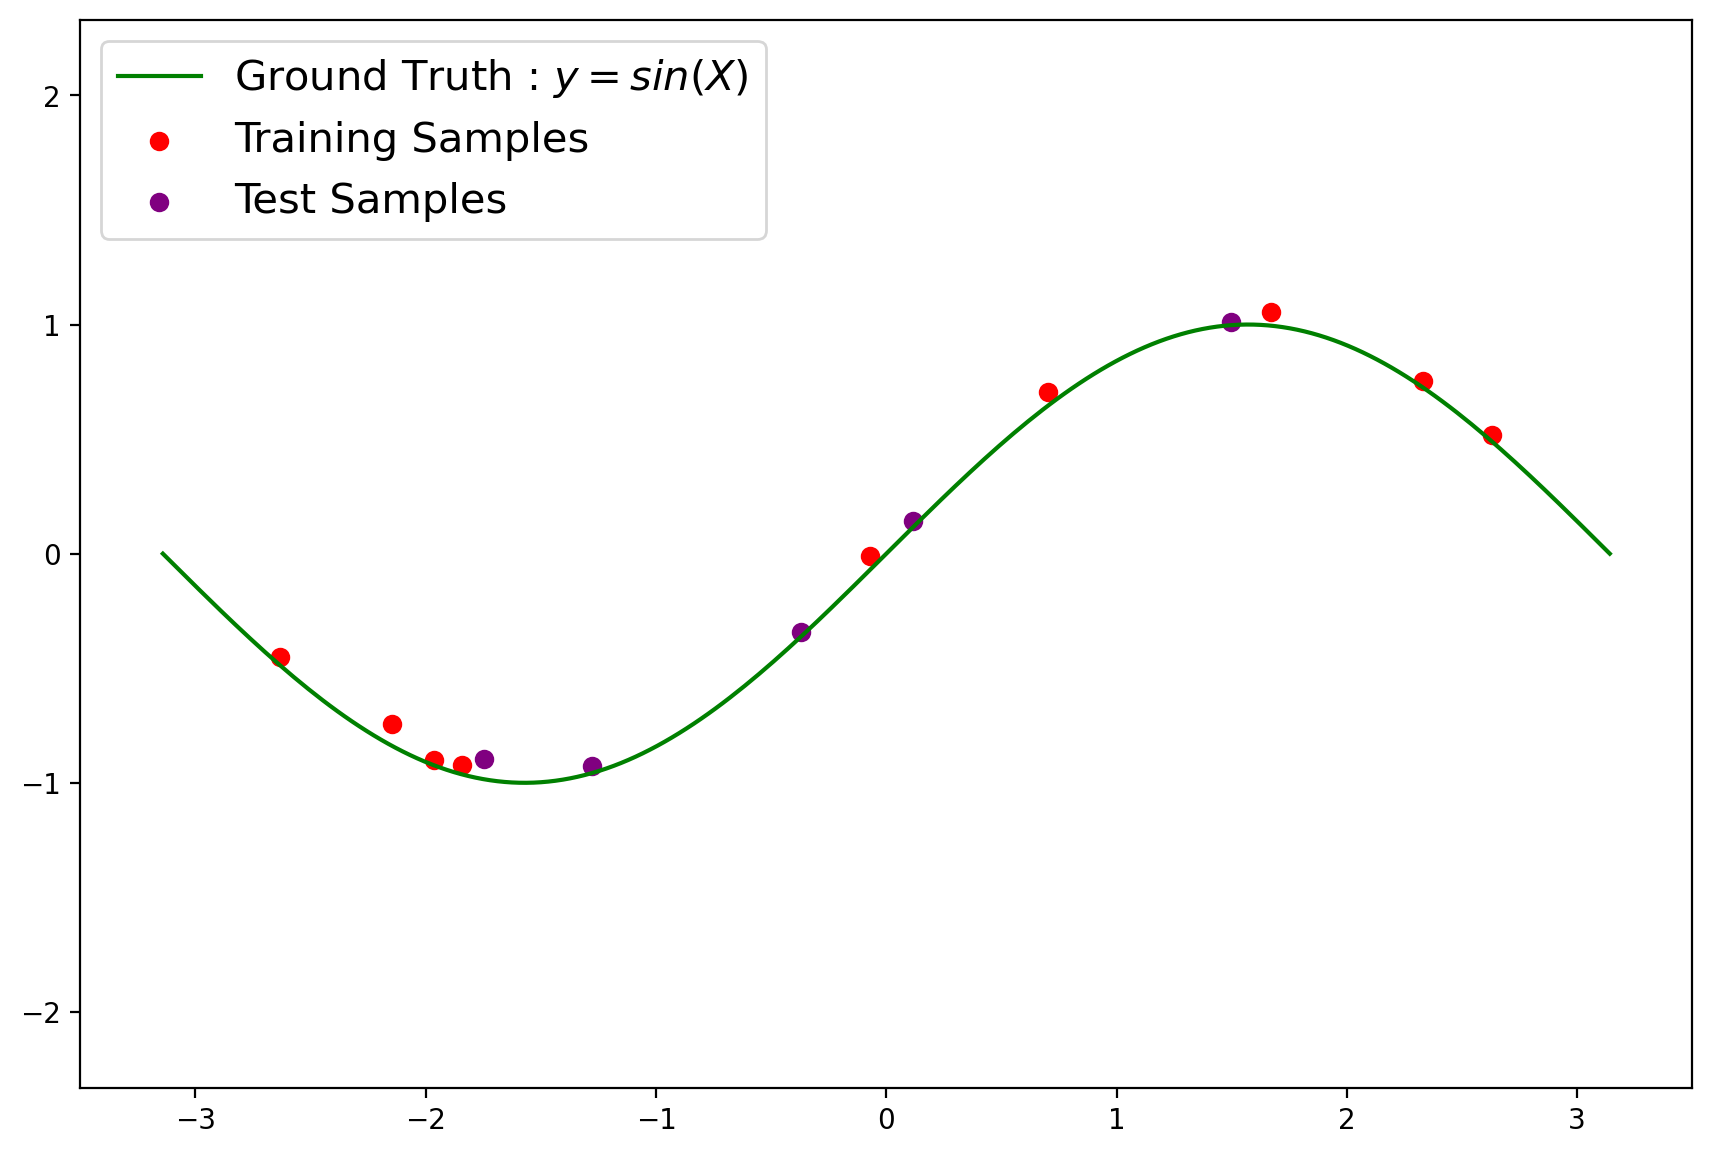

In [45]:
scale_factor = 0.65
plt.figure(figsize=(16*scale_factor,10.667*scale_factor))
plt.axis([-3.5,3.5,-2.33,2.33])
plt.plot(x_i, y_i, c='green', label='Ground Truth : $y=sin(X)$')
plt.scatter(X_train, y_train, c='red', label='Training Samples')
plt.scatter(X_test, y_test, c='purple', label='Test Samples')
plt.legend(loc="upper left", fontsize=15)
plt.plot()

In [47]:
from sklearn.kernel_ridge import KernelRidge
clf=KernelRidge(degree=2,kernel='poly', alpha=0)
clf.fit(X_train,y_train)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


KernelRidge(alpha=0, degree=2, kernel='poly')

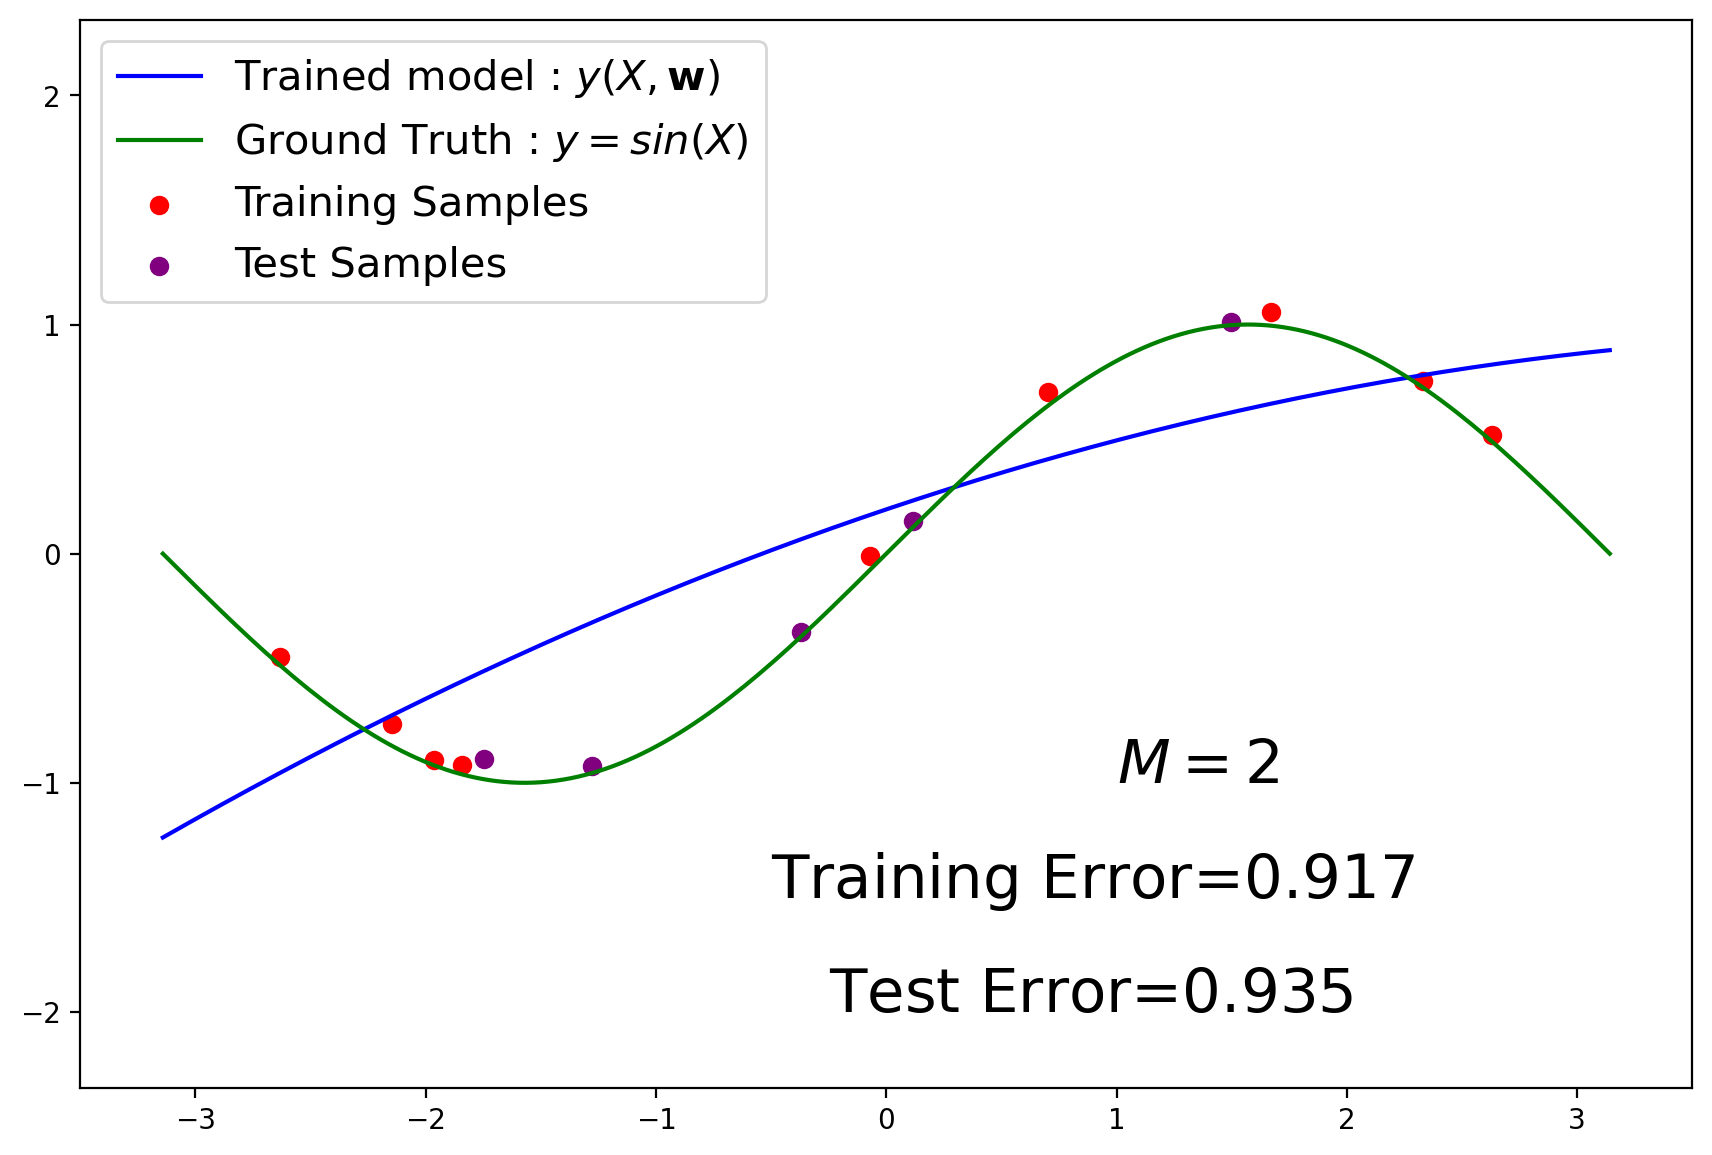

In [49]:
from numpy import linalg as LA

error_train = LA.norm(clf.predict(X_train)-y_train, 'fro')
error_test = LA.norm(clf.predict(X_test)-y_test, 'fro')

plt.figure(figsize=(16*scale_factor,10.667*scale_factor))
plt.axis([-3.5,3.5,-2.33,2.33])
plt.plot(x_i, clf.predict(x_i), c='blue', label='Trained model : $y(X,\mathbf{w})$')
plt.plot(x_i, y_i, c='green', label='Ground Truth : $y=sin(X)$')
plt.scatter(X_train, y_train, c='red', label='Training Samples')
plt.scatter(X_test, y_test, c='purple', label='Test Samples')
plt.text(1,-1,'$M=2$',fontsize=22)
plt.text(-0.5,-1.5,'Training Error=${0:.3f}$'.format(error_train), fontsize=22)
plt.text(-0.25,-2.0,'Test Error=${0:.3f}$'.format(error_test), fontsize=22)
plt.legend(loc="upper left", fontsize=15)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual

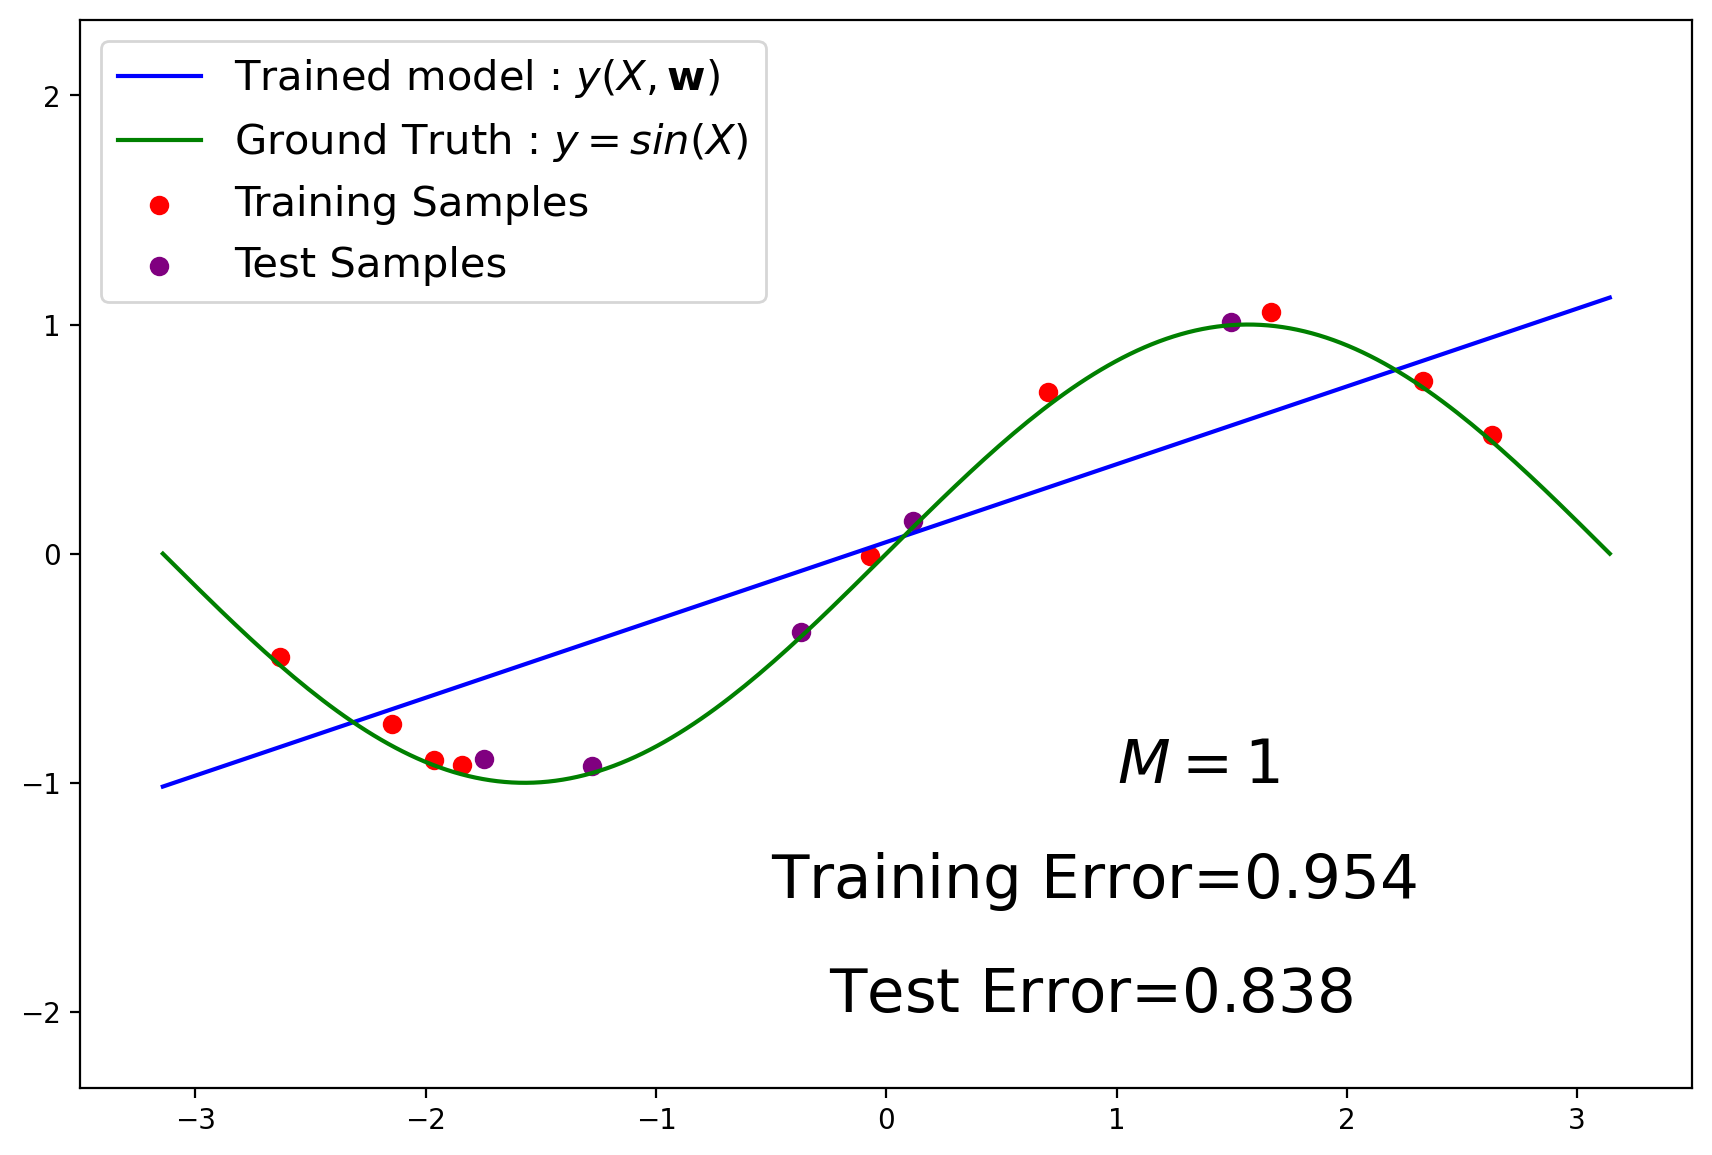

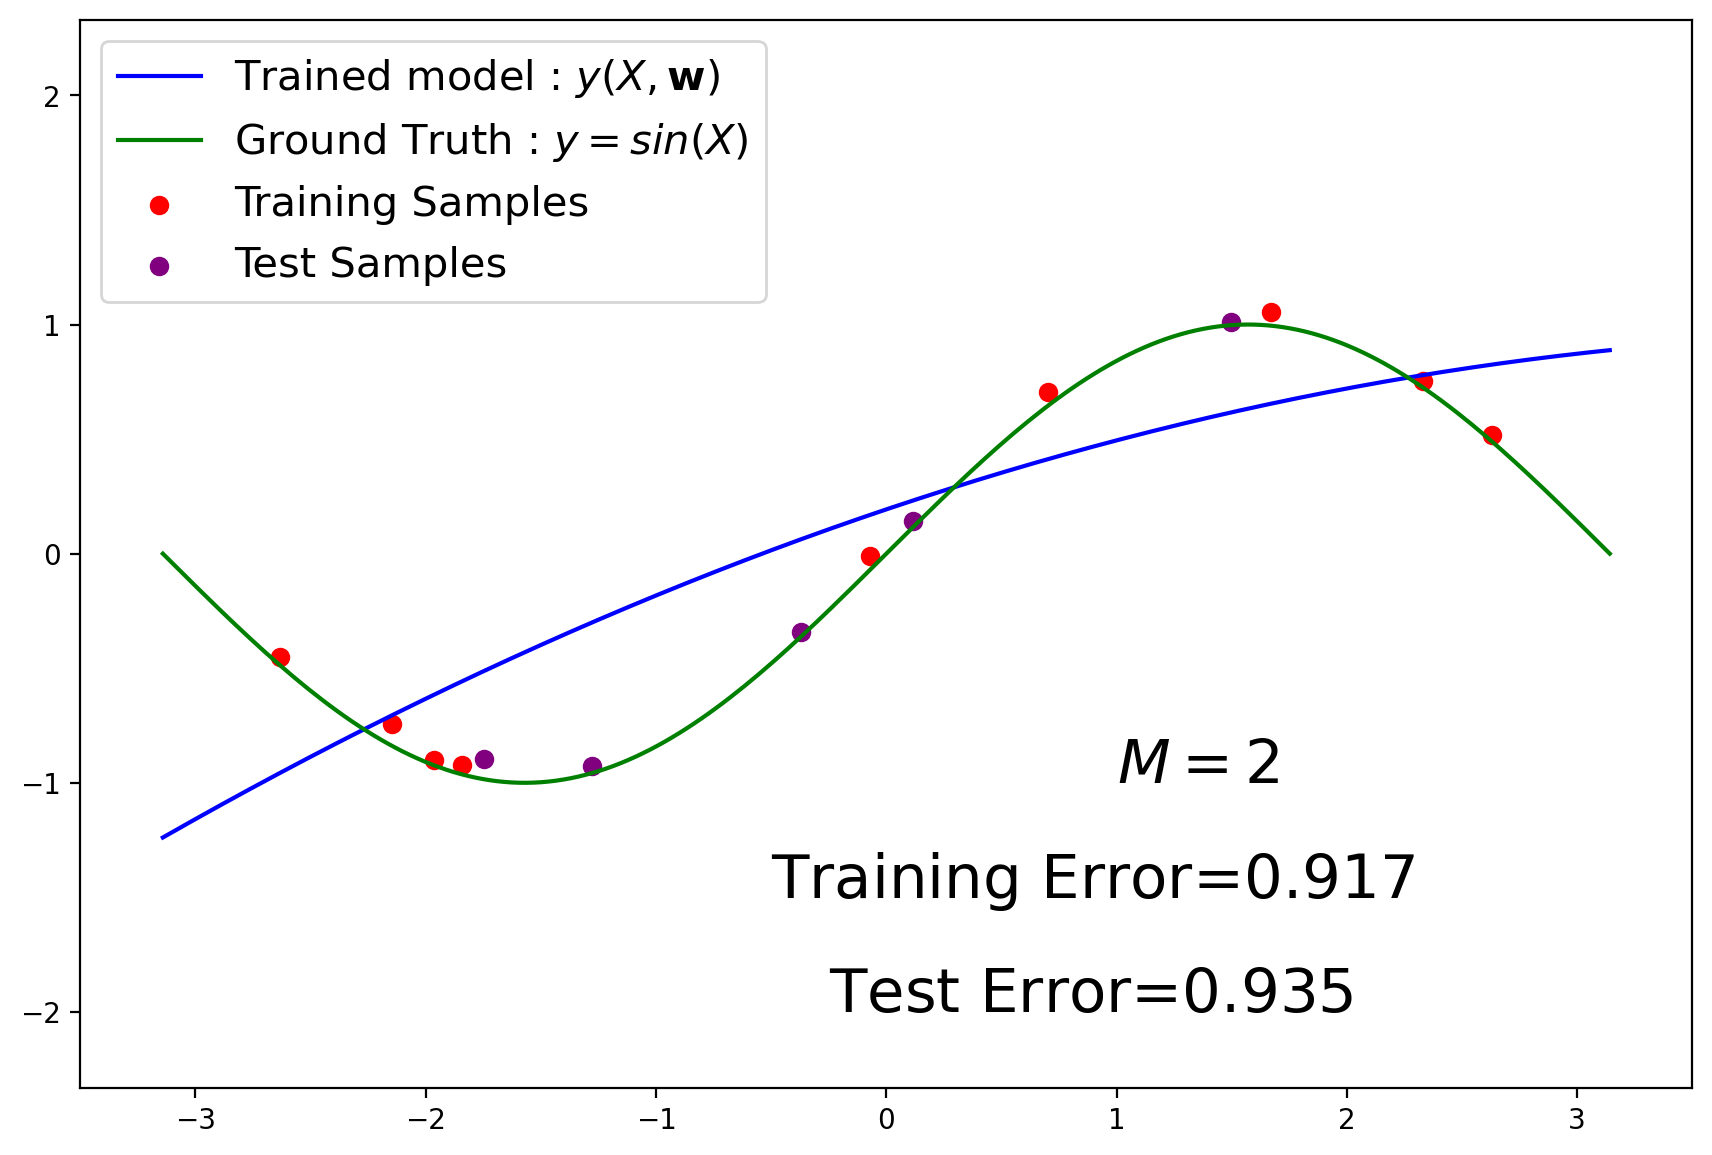

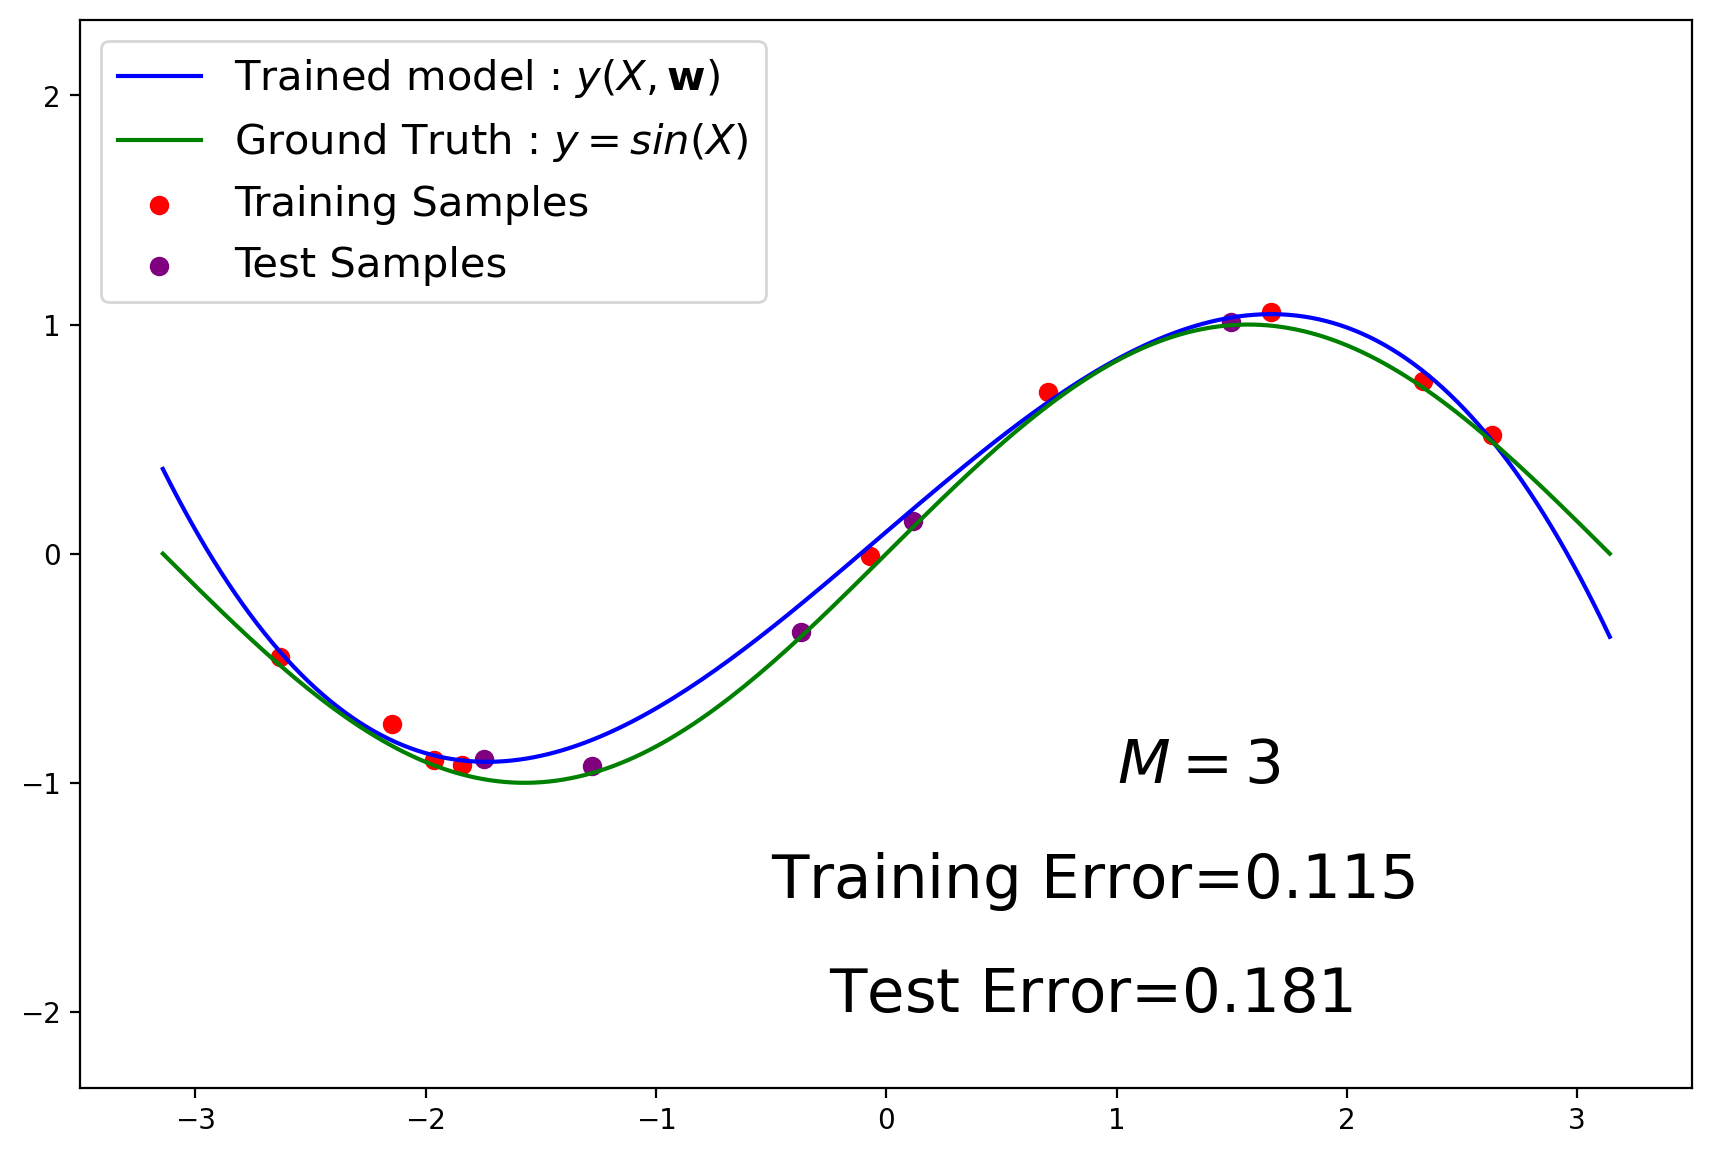

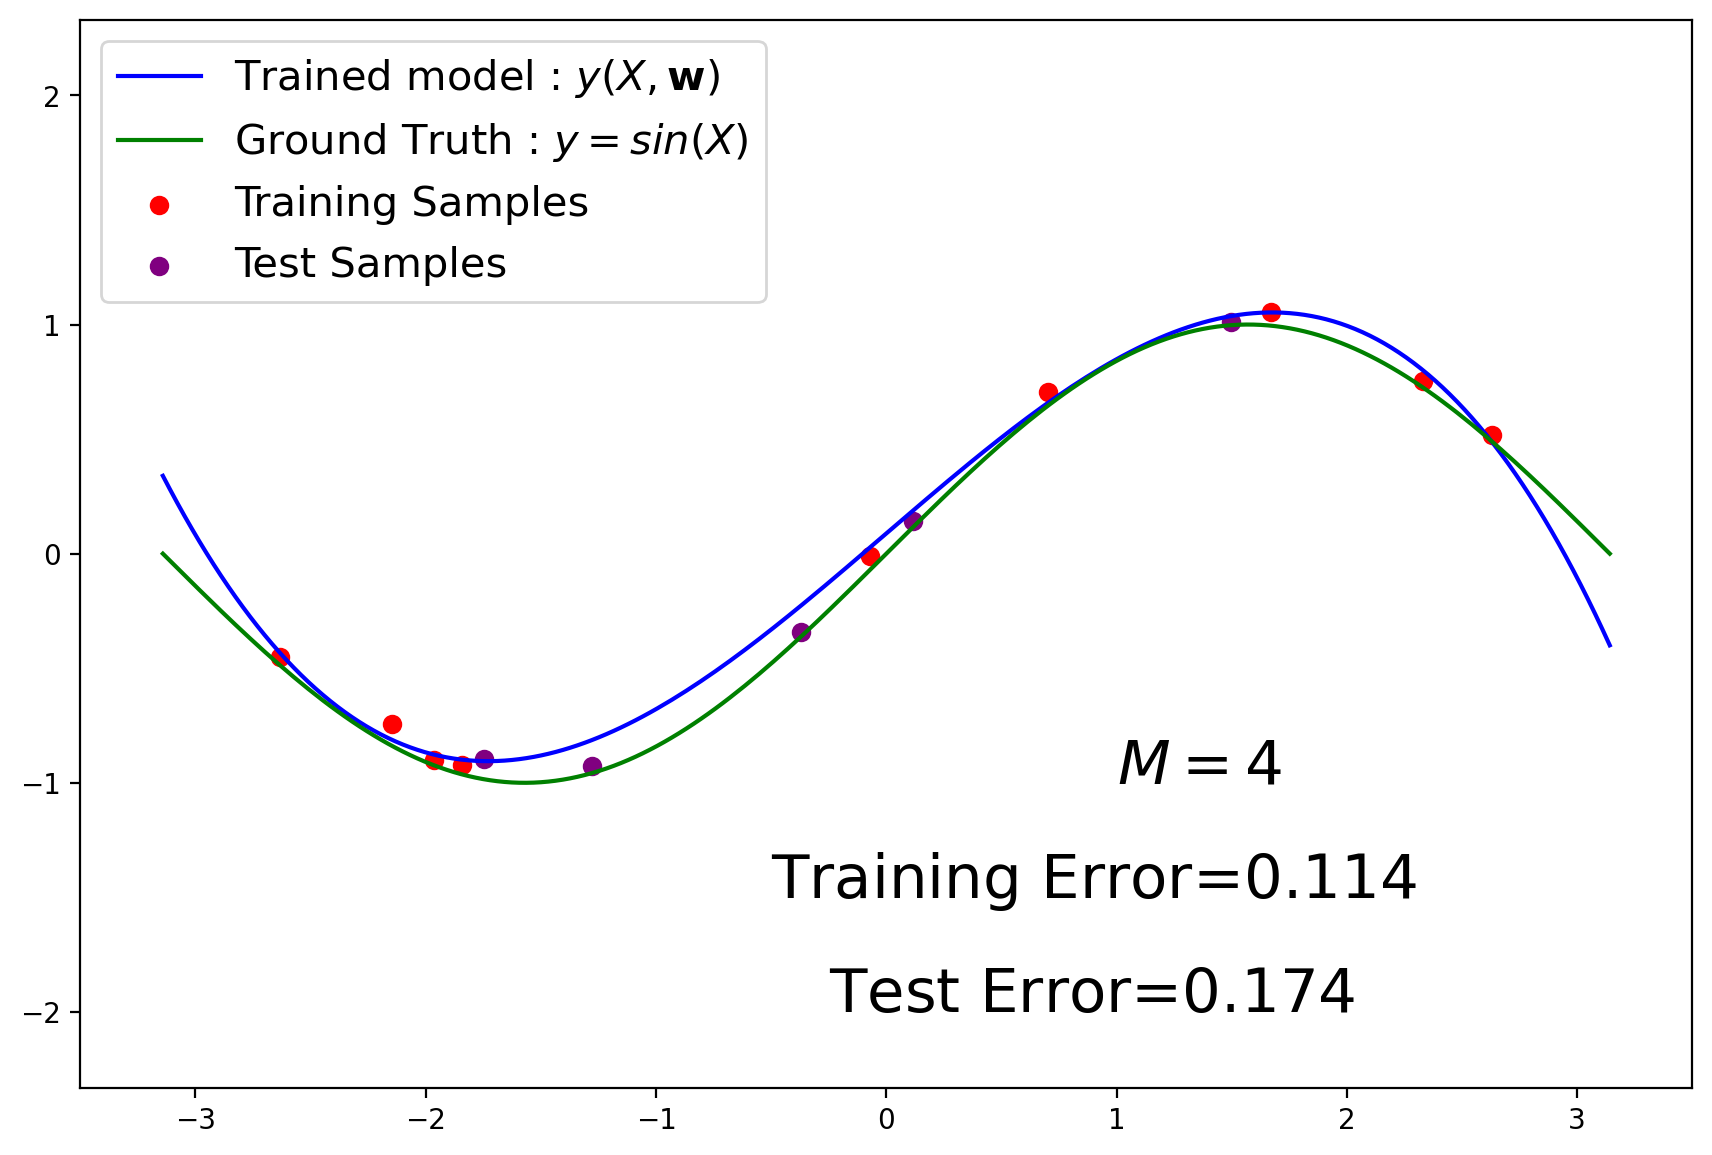

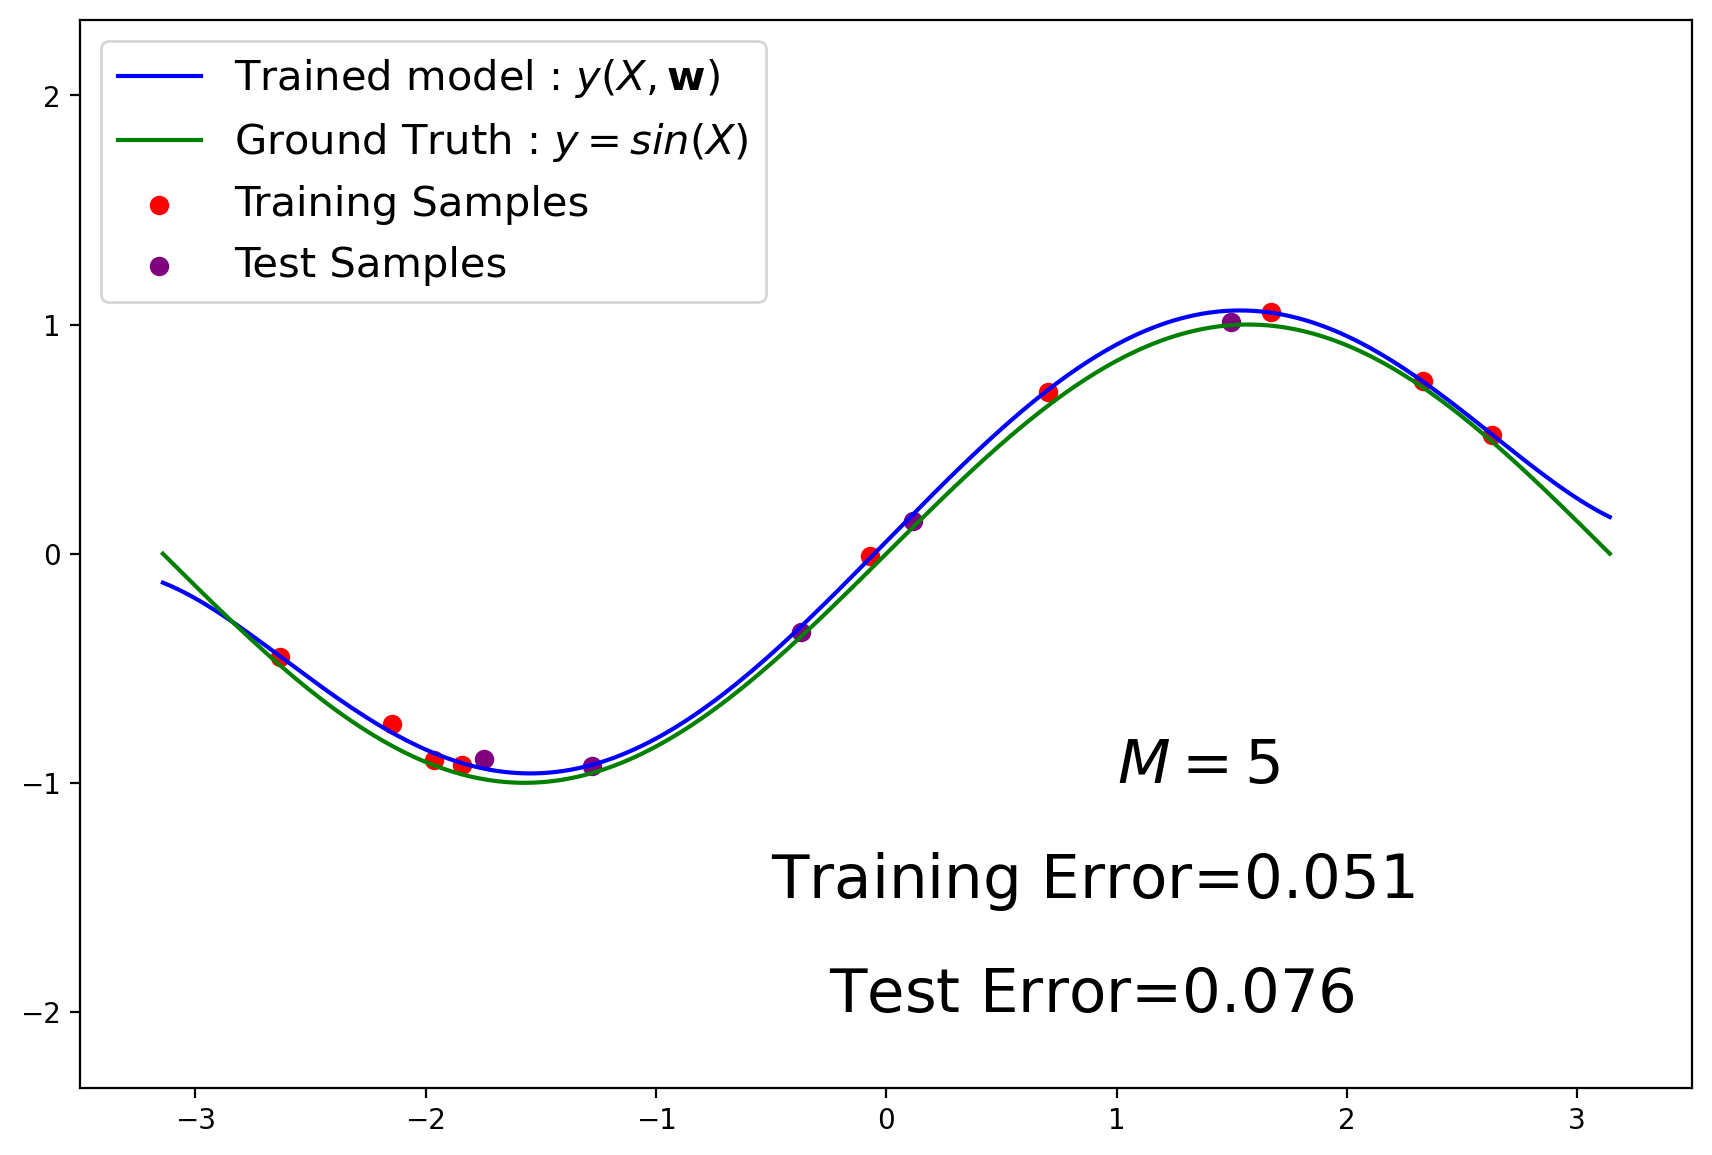

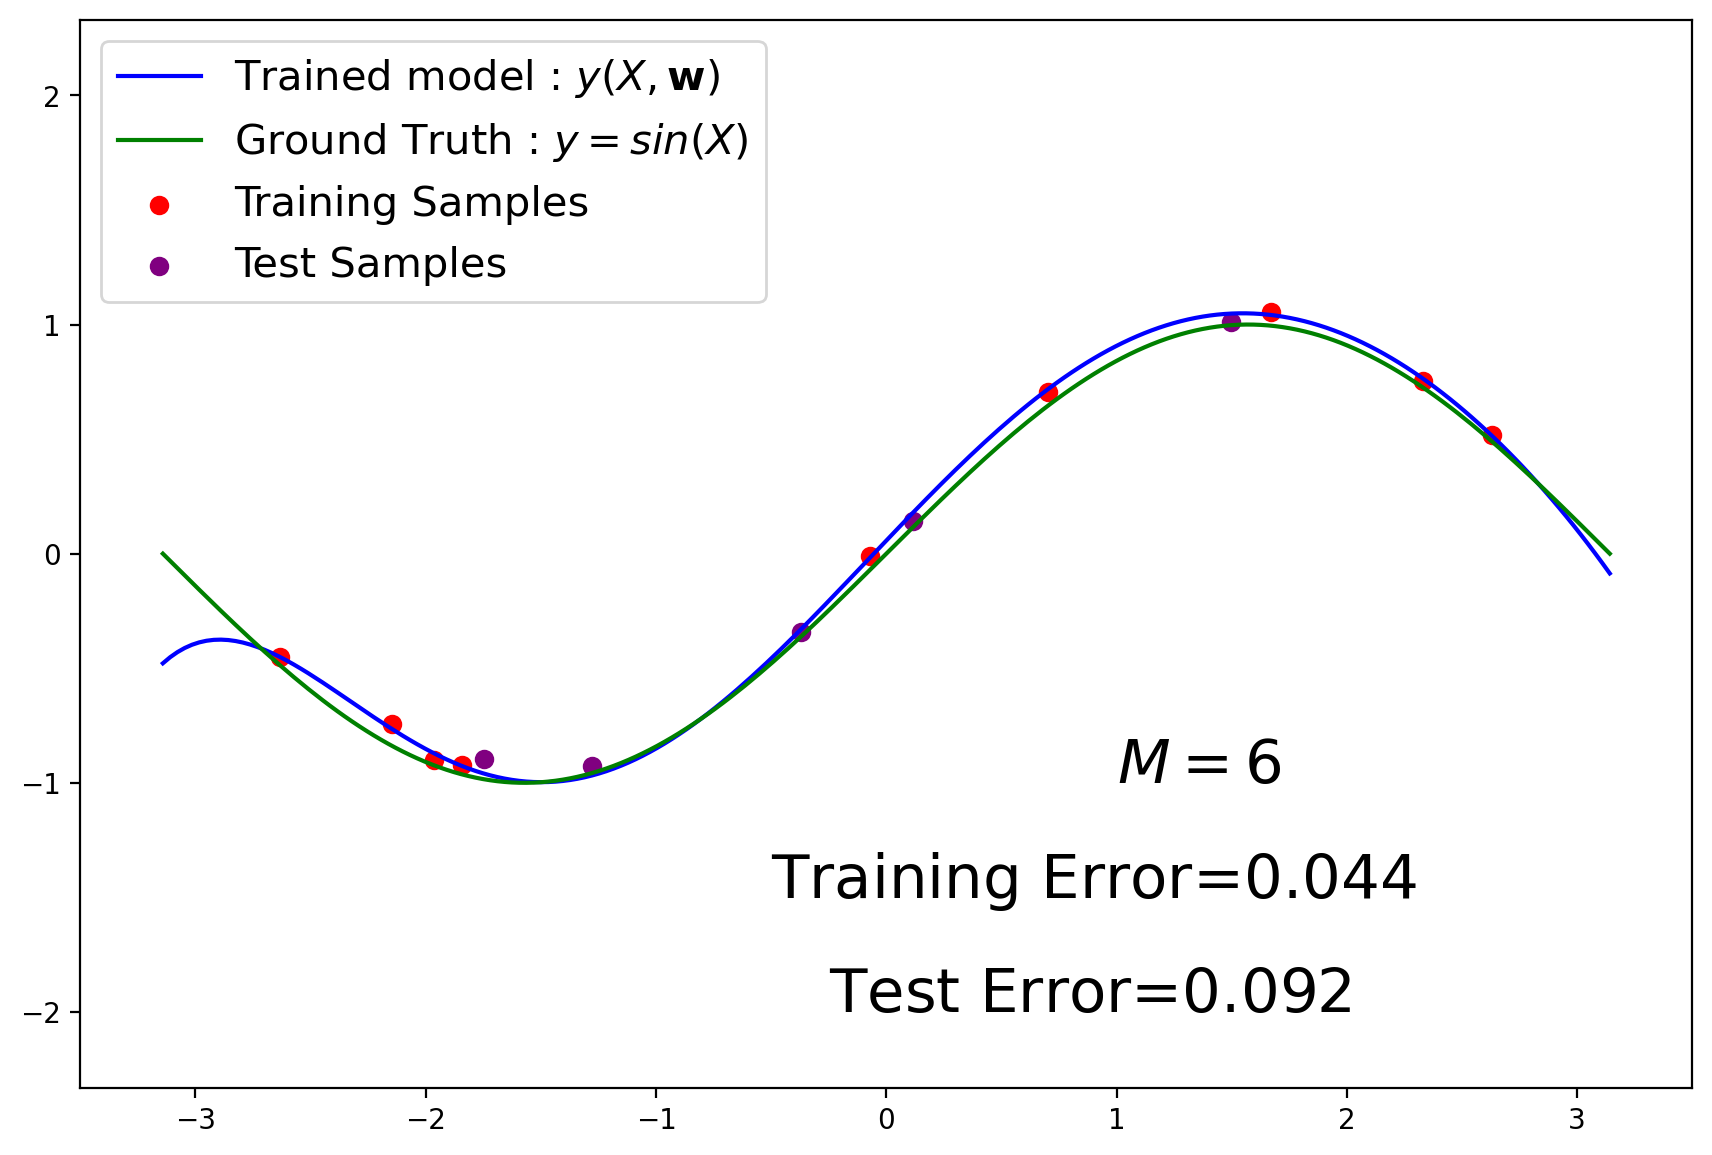

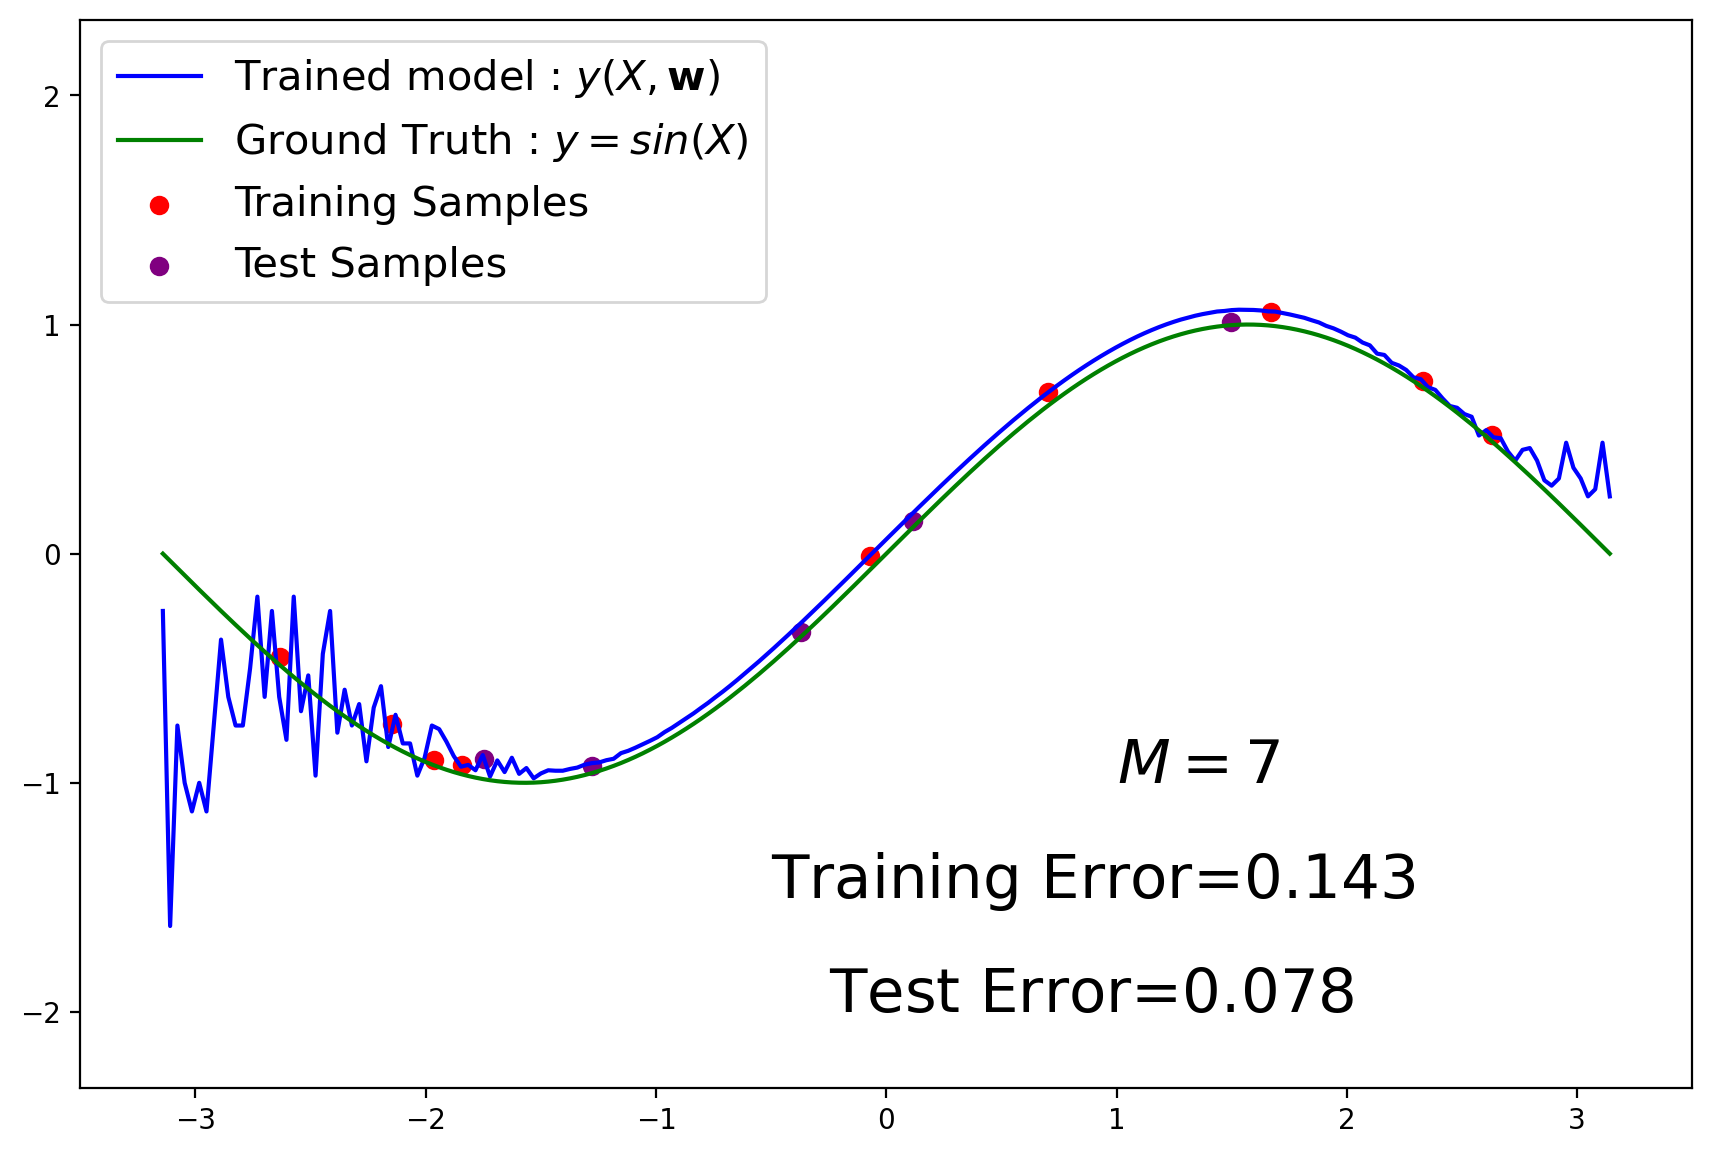

In [73]:
errors_train = [] 
errors_test = []

M_max = X_train.shape[0]-1

for m in range(1,M_max):
        clf = KernelRidge(degree=m, kernel='poly', alpha=0)
        clf.fit(X_train, y_train)
        error_train = LA.norm(clf.predict(X_train)-y_train, 'fro')
        errors_train.append(error_train)
        error_test = LA.norm(clf.predict(X_test)-y_test, 'fro')
        errors_test.append(error_test)
        
        plt.figure(figsize=(16*scale_factor,10.667*scale_factor))
        plt.axis([-3.5,3.5,-2.33,2.33])
        plt.plot(x_i, clf.predict(x_i), c='blue', label='Trained model : $y(X,\mathbf{w})$')
        plt.plot(x_i, y_i, c='green', label='Ground Truth : $y=sin(X)$')
        plt.scatter(X_train, y_train, c='red', label='Training Samples')
        plt.scatter(X_test, y_test, c='purple', label='Test Samples')
        plt.text(1,-1,'$M={}$'.format(m),fontsize=22)
        plt.text(-0.5,-1.5,'Training Error=${0:.3f}$'.format(error_train), fontsize=22)
        plt.text(-0.25,-2.0,'Test Error=${0:.3f}$'.format(error_test), fontsize=22)
        plt.legend(loc="upper left", fontsize=15)
    


(0.01, 5)

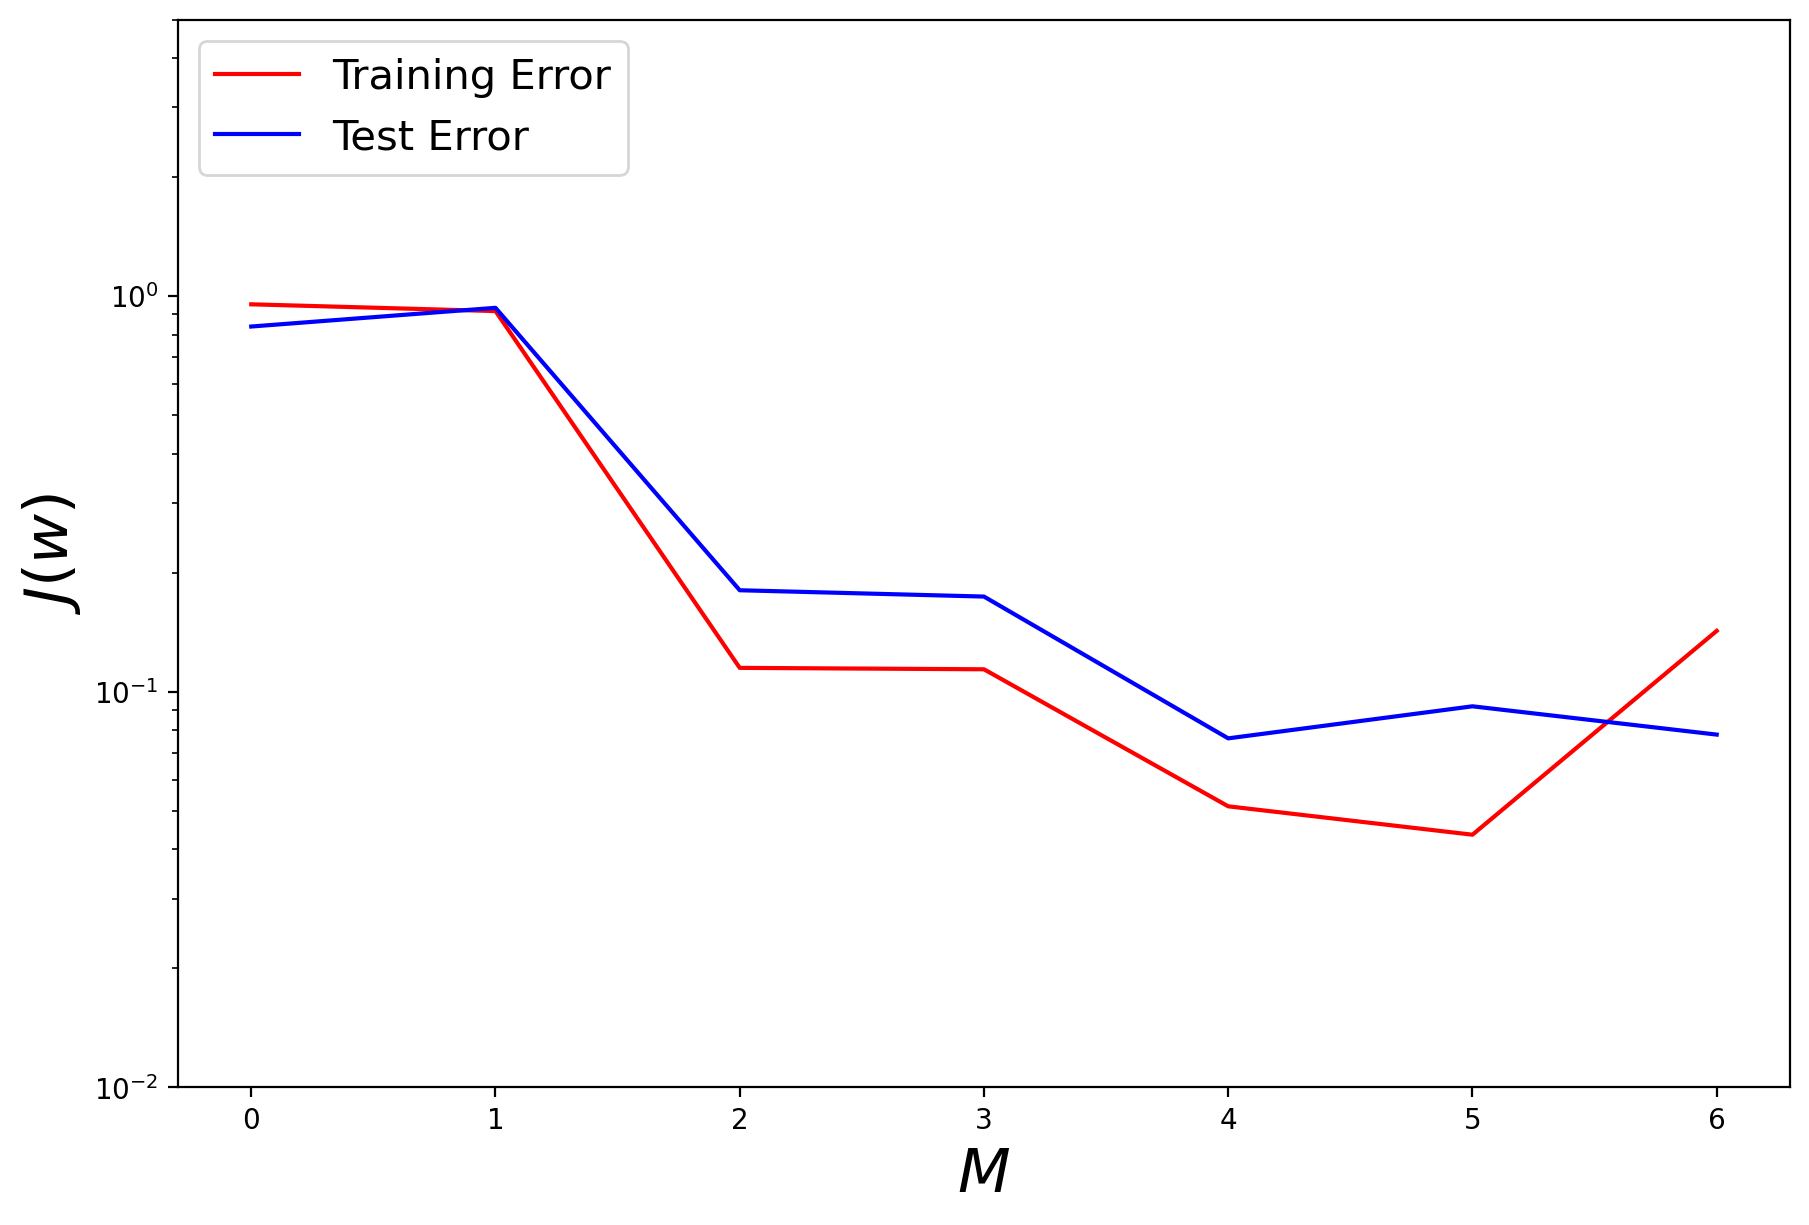

In [75]:
x_m = [i for i in range(len(errors_train))]

plt.figure(figsize=(16*scale_factor,10.667*scale_factor))
plt.plot(x_m, errors_train, c='red', label='Training Error')
plt.plot(x_m, errors_test, c='blue', label='Test Error')
plt.legend(loc="upper left", fontsize=15)
plt.yscale('log')
plt.xlabel('$M$', fontsize=22)
plt.ylabel('$J(w)$', fontsize=22)
plt.ylim(0.01,5)

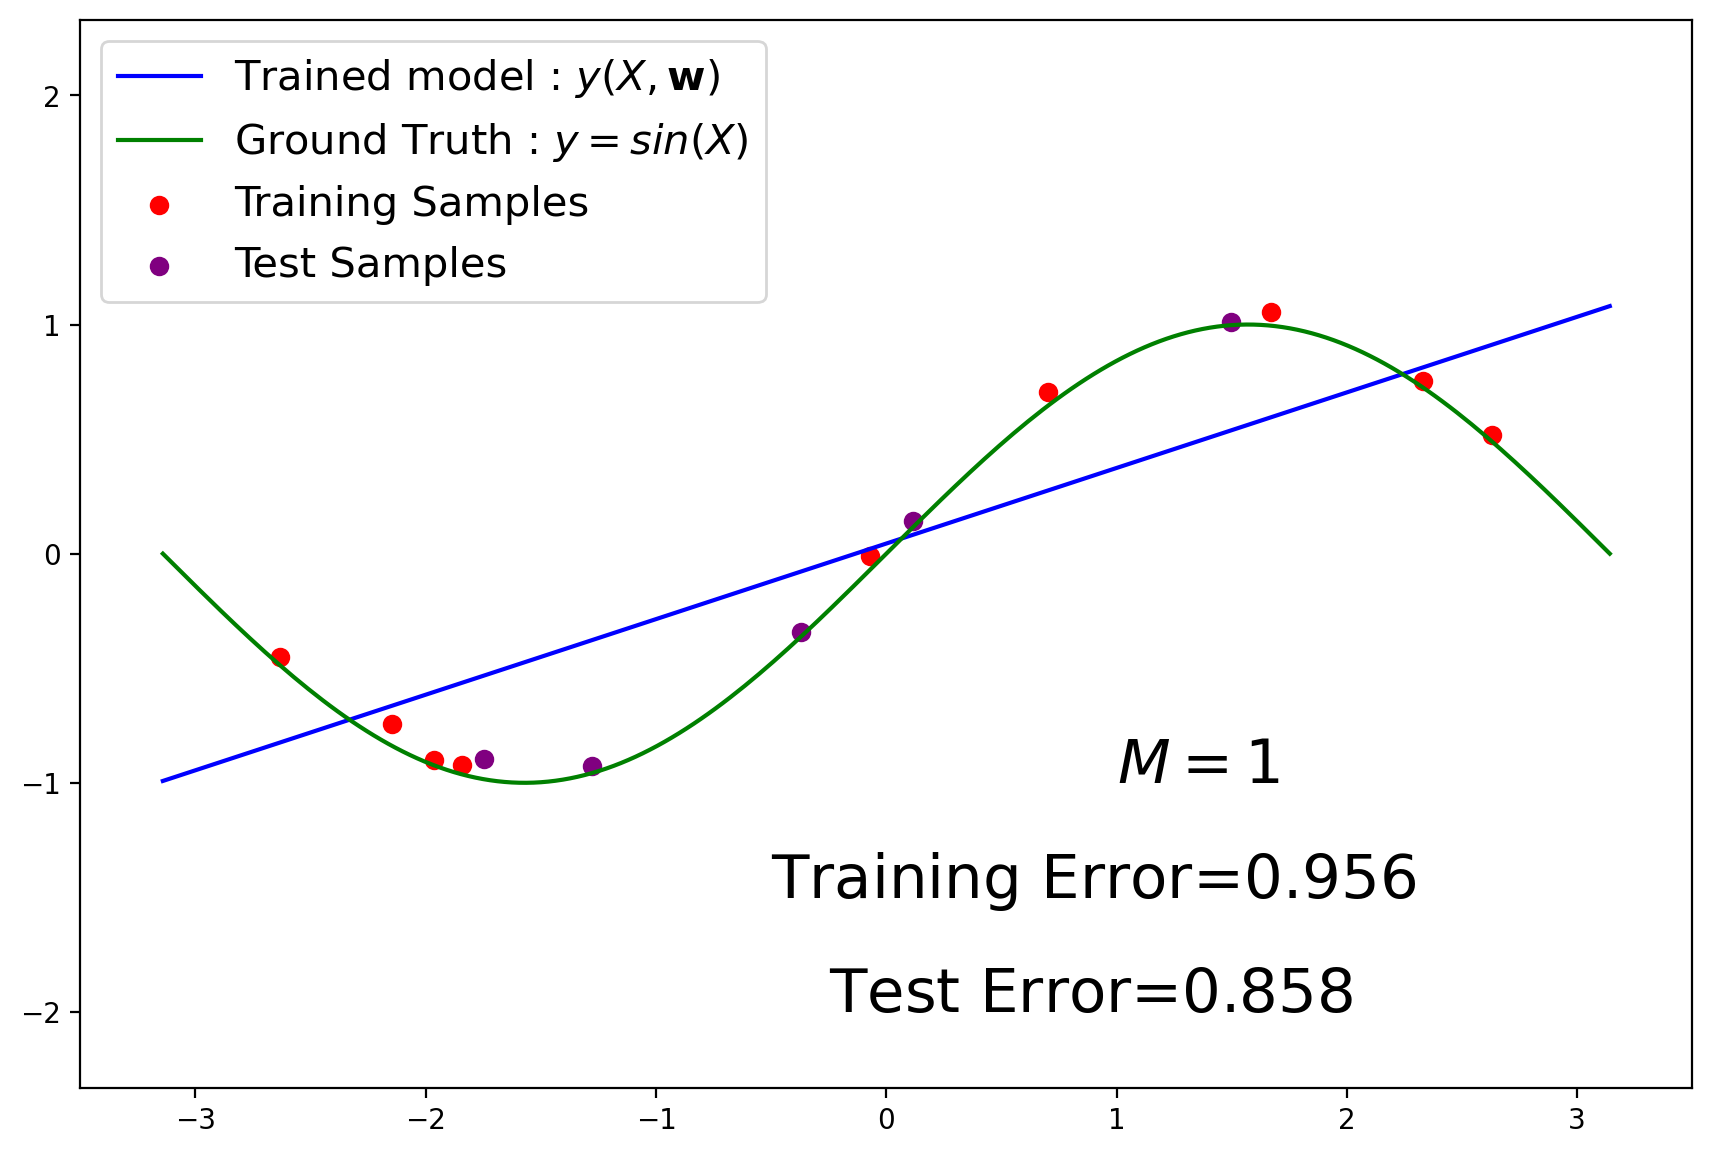

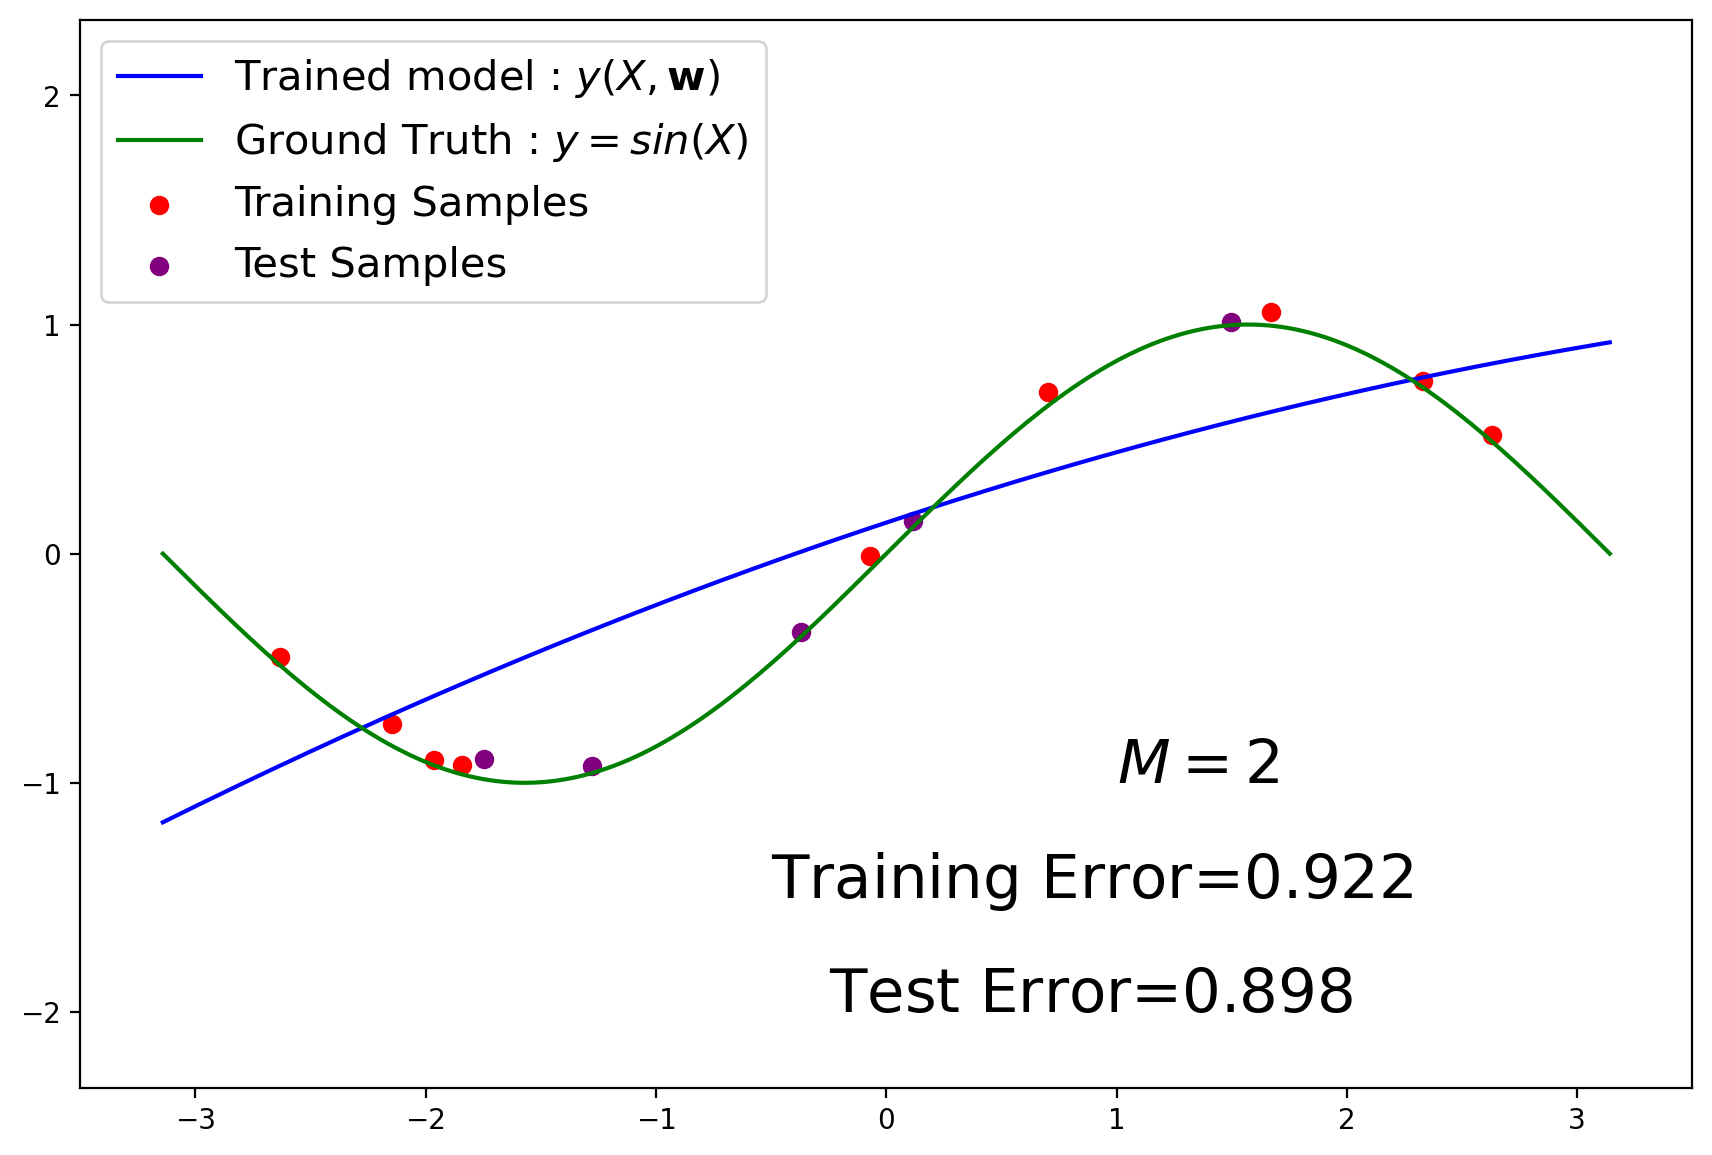

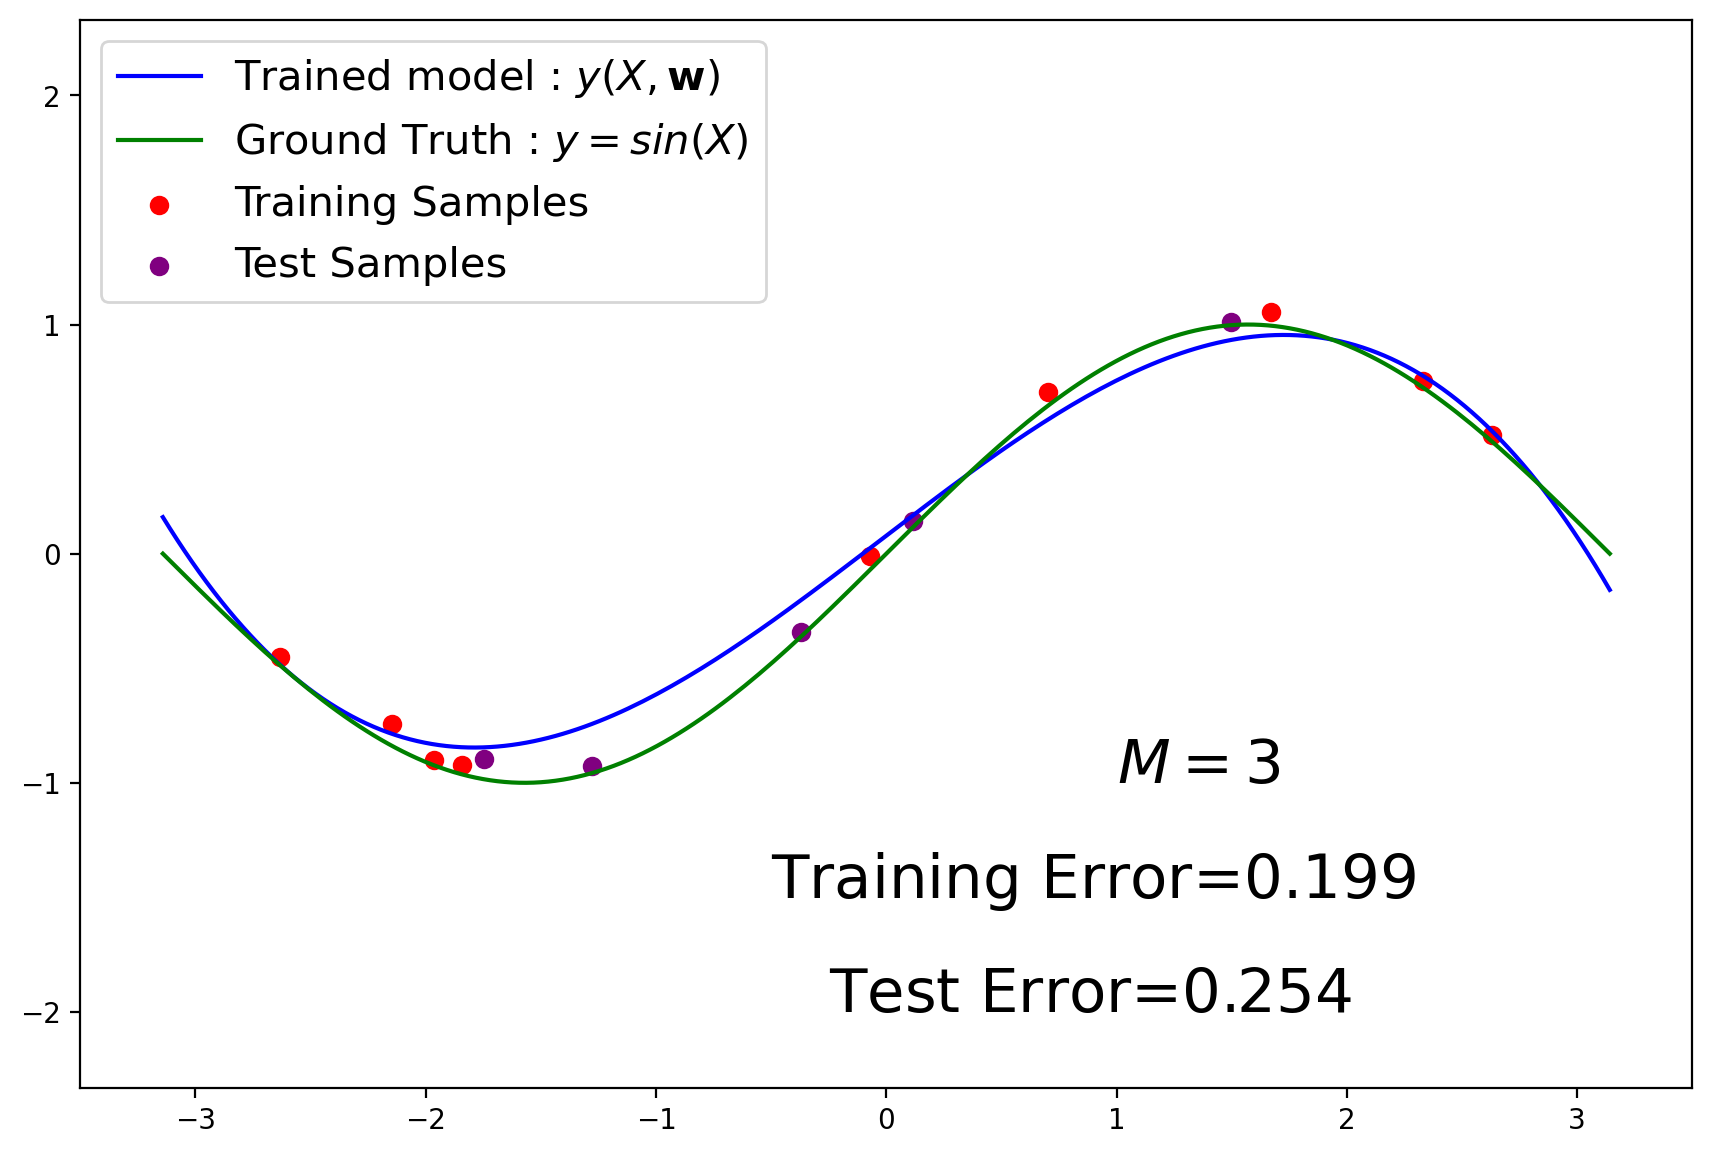

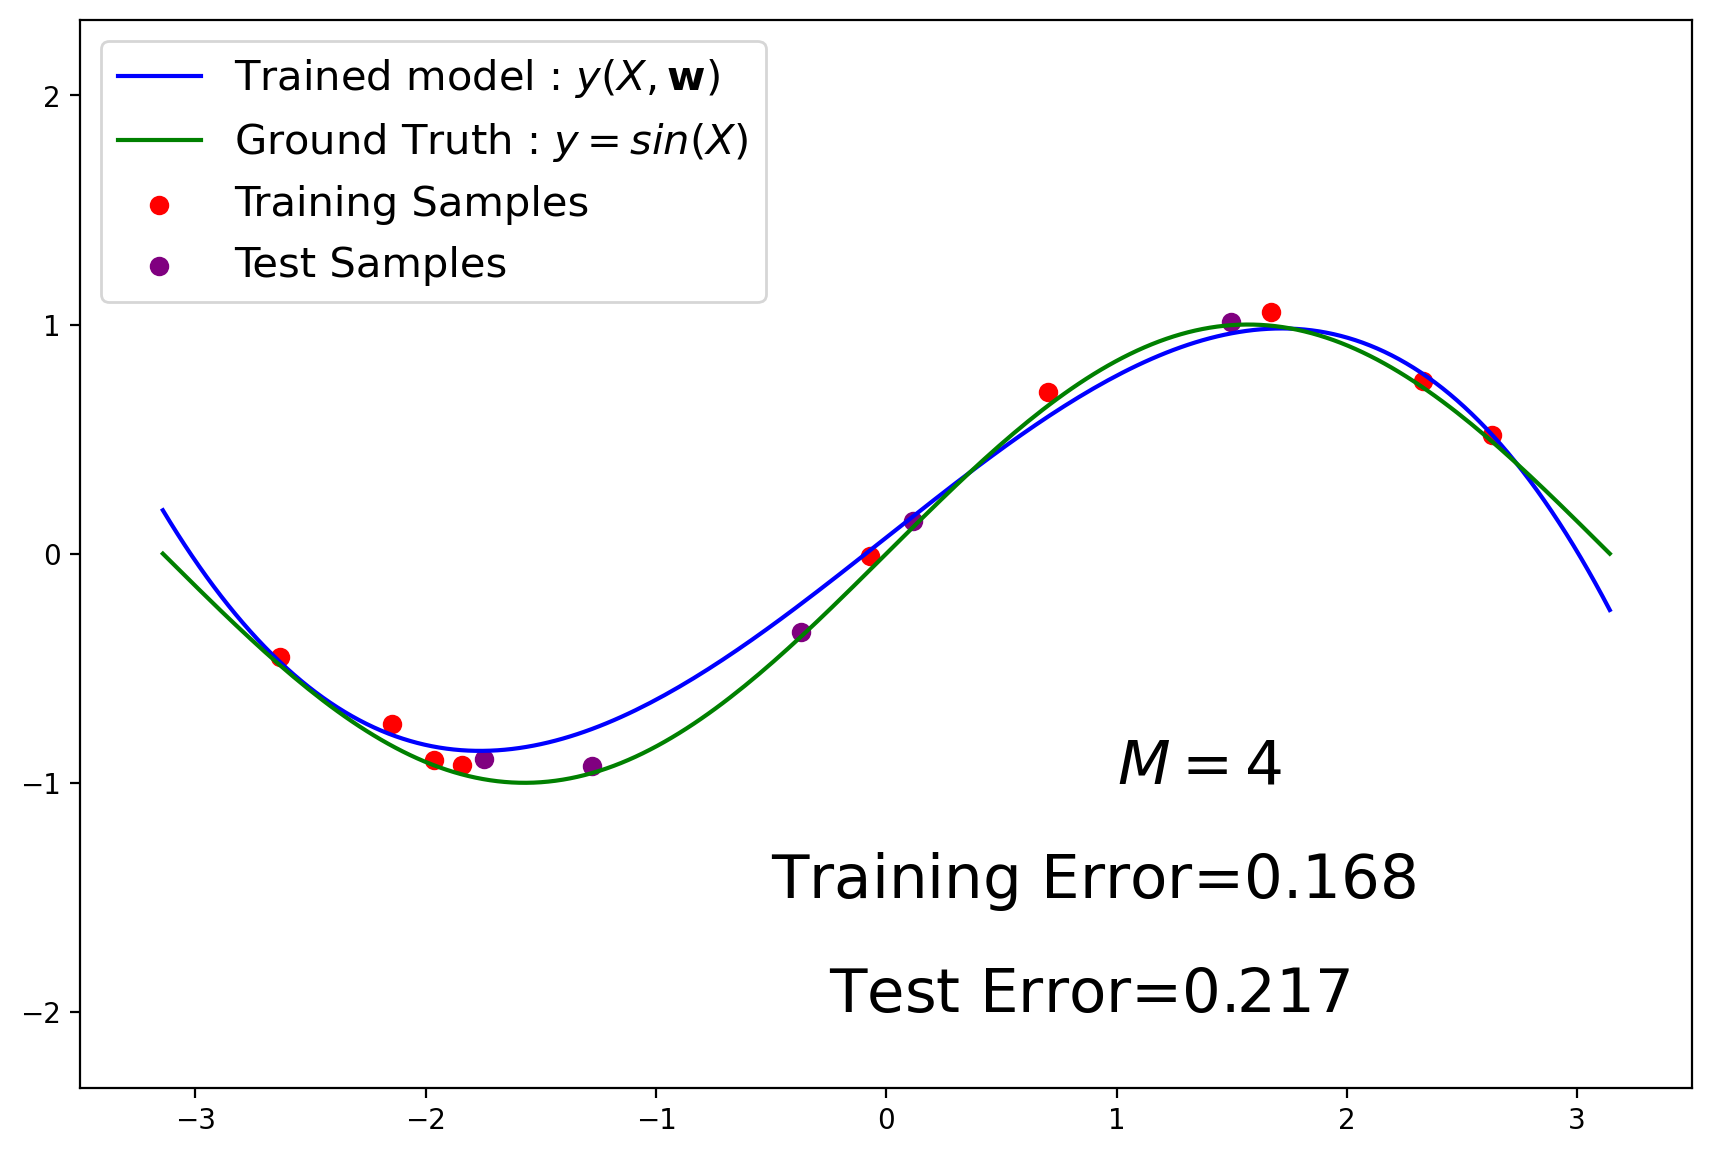

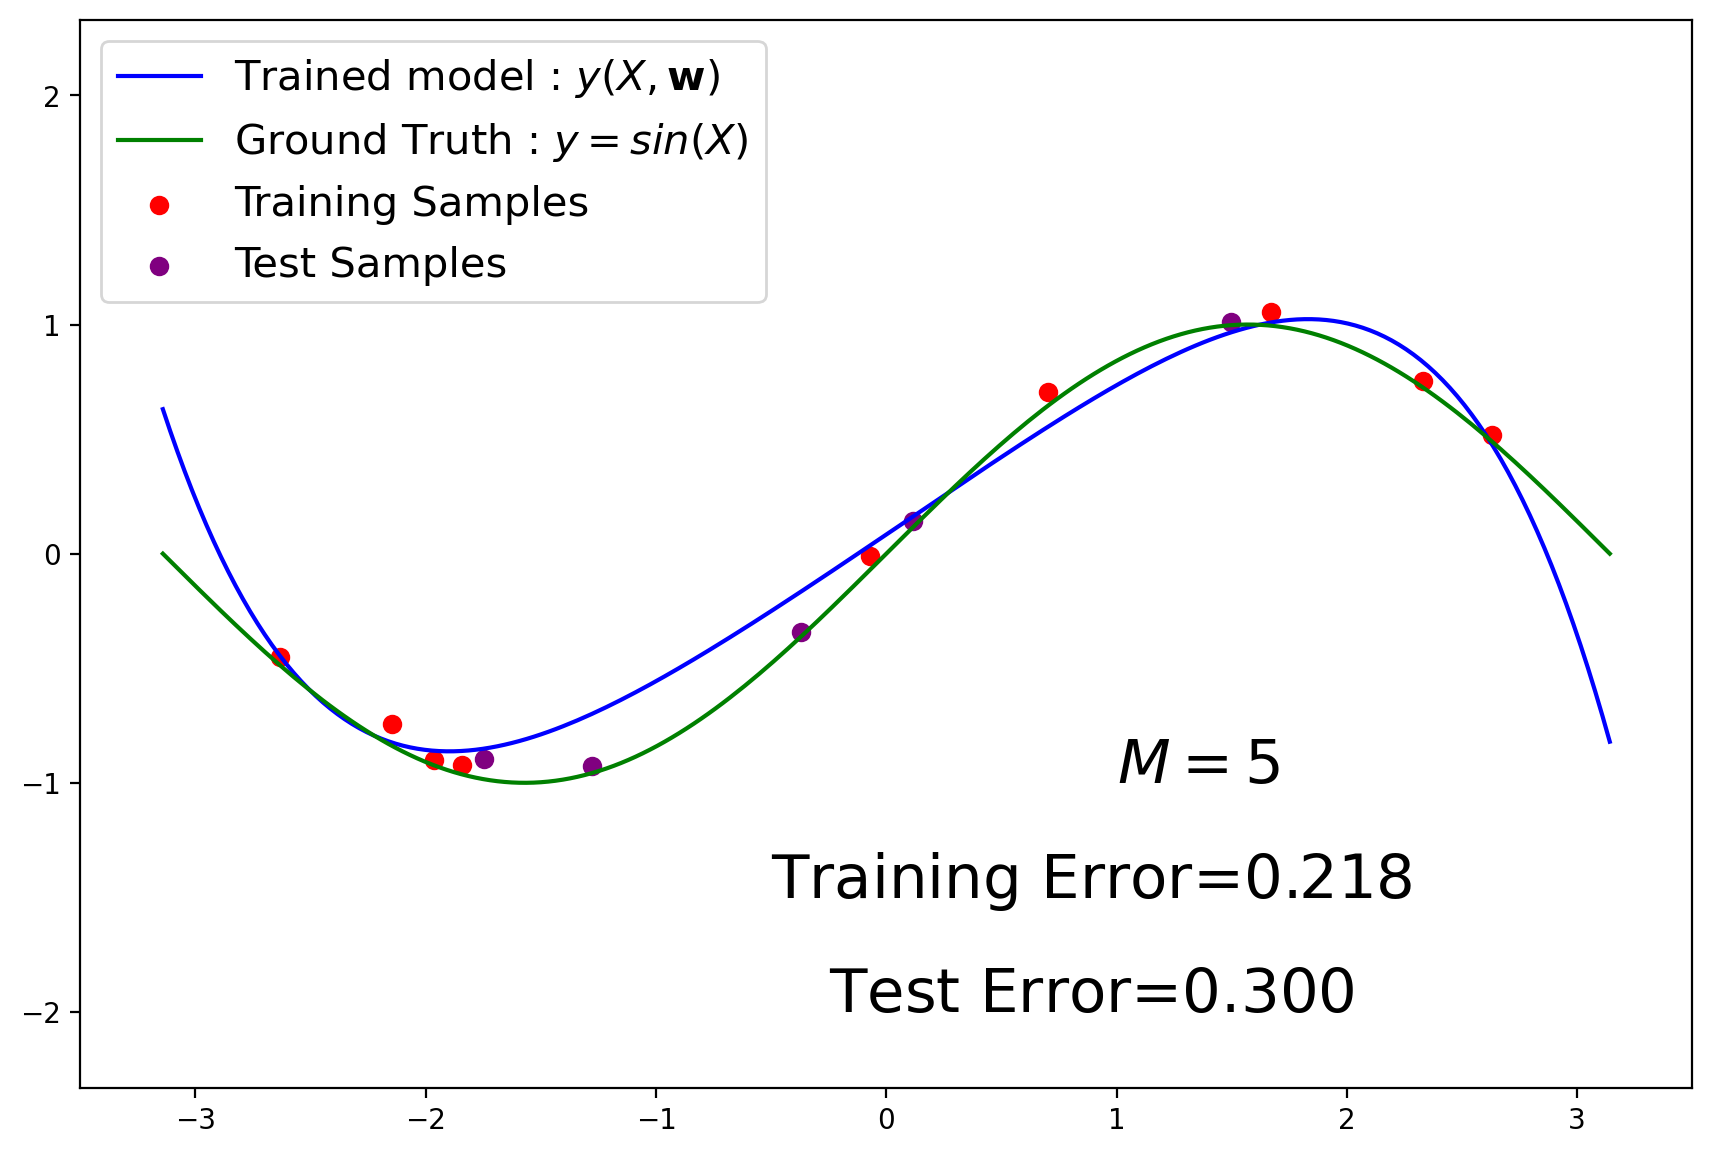

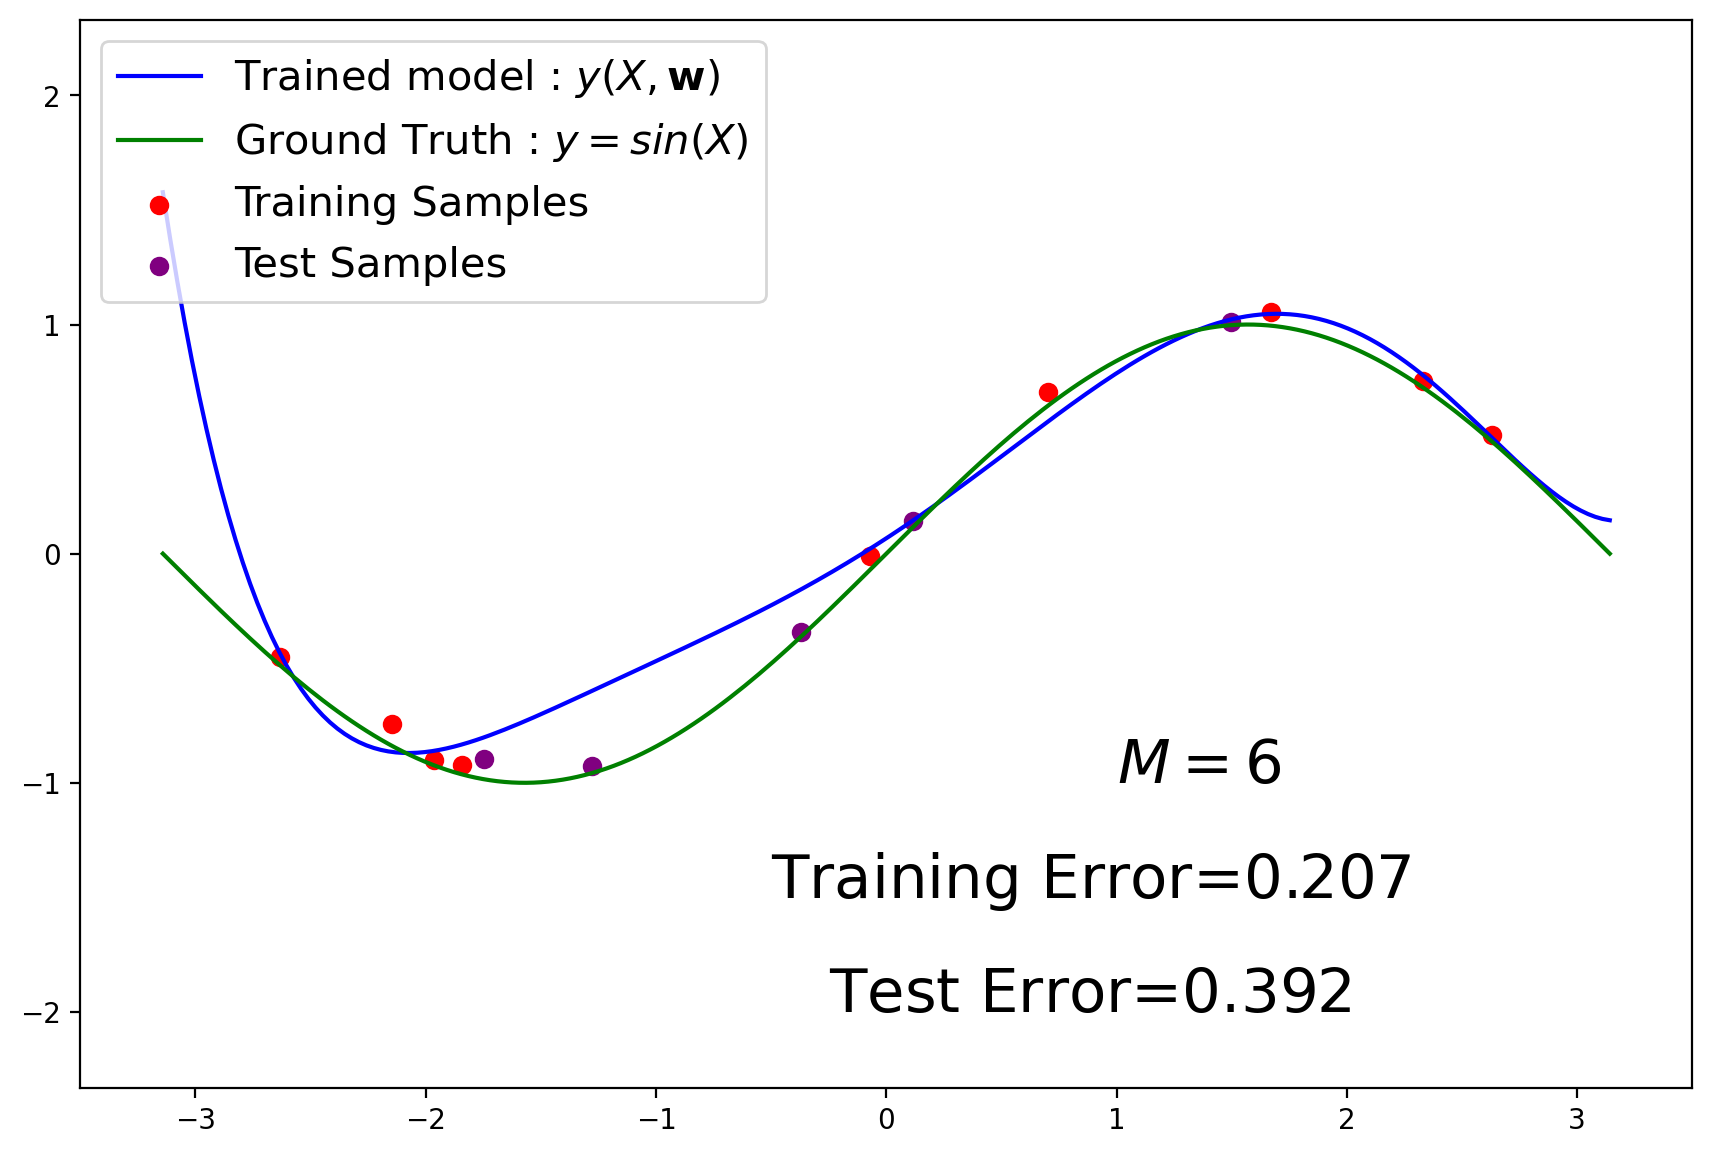

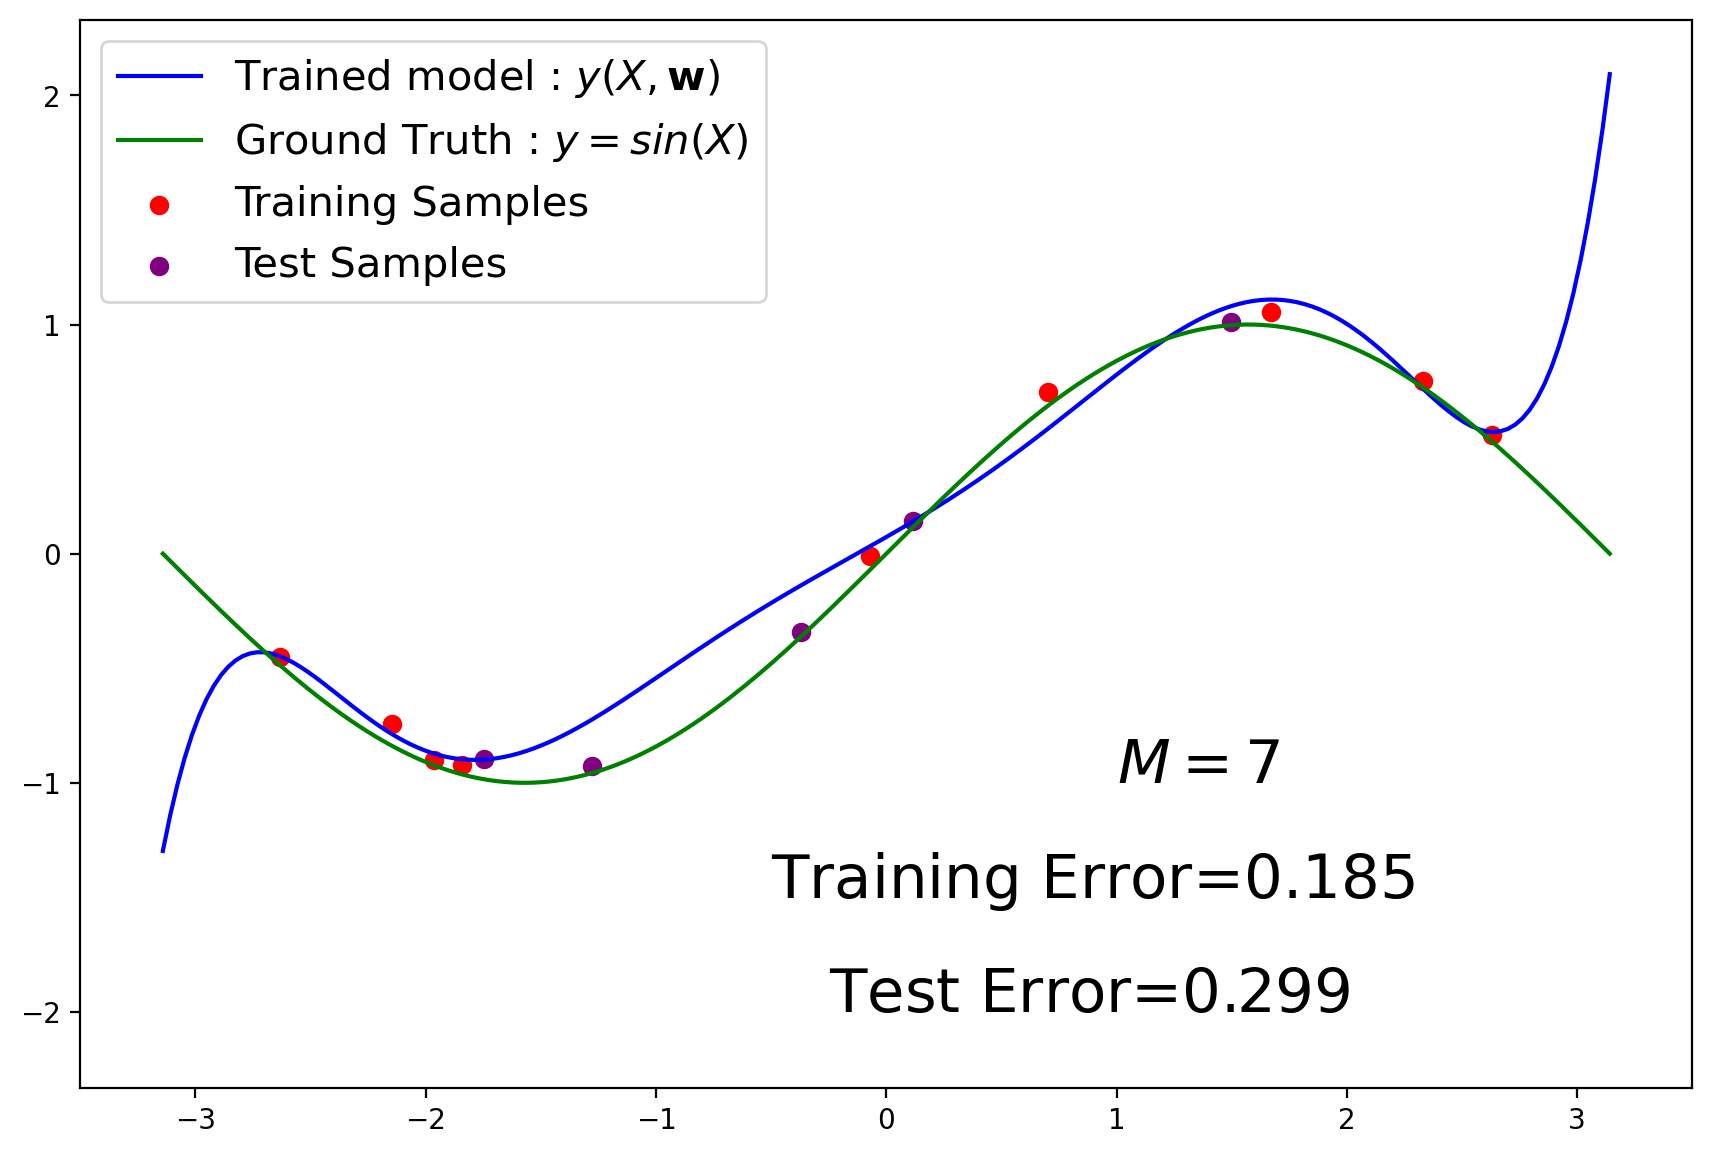

In [124]:
# Introduced regularization

errors_train_reg= [] 
errors_test_reg = []


for m in range(1,M_max):
        clf = KernelRidge(degree=m, kernel='poly', alpha=1) 
        clf.fit(X_train, y_train)
        error_train = LA.norm(clf.predict(X_train)-y_train, 'fro')
        errors_train_reg.append(error_train)
        error_test= LA.norm(clf.predict(X_test)-y_test, 'fro')
        errors_test_reg.append(error_test)
        
        plt.figure(figsize=(16*scale_factor,10.667*scale_factor))
        plt.axis([-3.5,3.5,-2.33,2.33])
        plt.plot(x_i, clf.predict(x_i), c='blue', label='Trained model : $y(X,\mathbf{w})$')
        plt.plot(x_i, y_i, c='green', label='Ground Truth : $y=sin(X)$')
        plt.scatter(X_train, y_train, c='red', label='Training Samples')
        plt.scatter(X_test, y_test, c='purple', label='Test Samples')
        plt.text(1,-1,'$M={}$'.format(m),fontsize=22)
        plt.text(-0.5,-1.5,'Training Error=${0:.3f}$'.format(error_train), fontsize=22)
        plt.text(-0.25,-2.0,'Test Error=${0:.3f}$'.format(error_test), fontsize=22)
        plt.legend(loc="upper left", fontsize=15)

    

(0.01, 5)

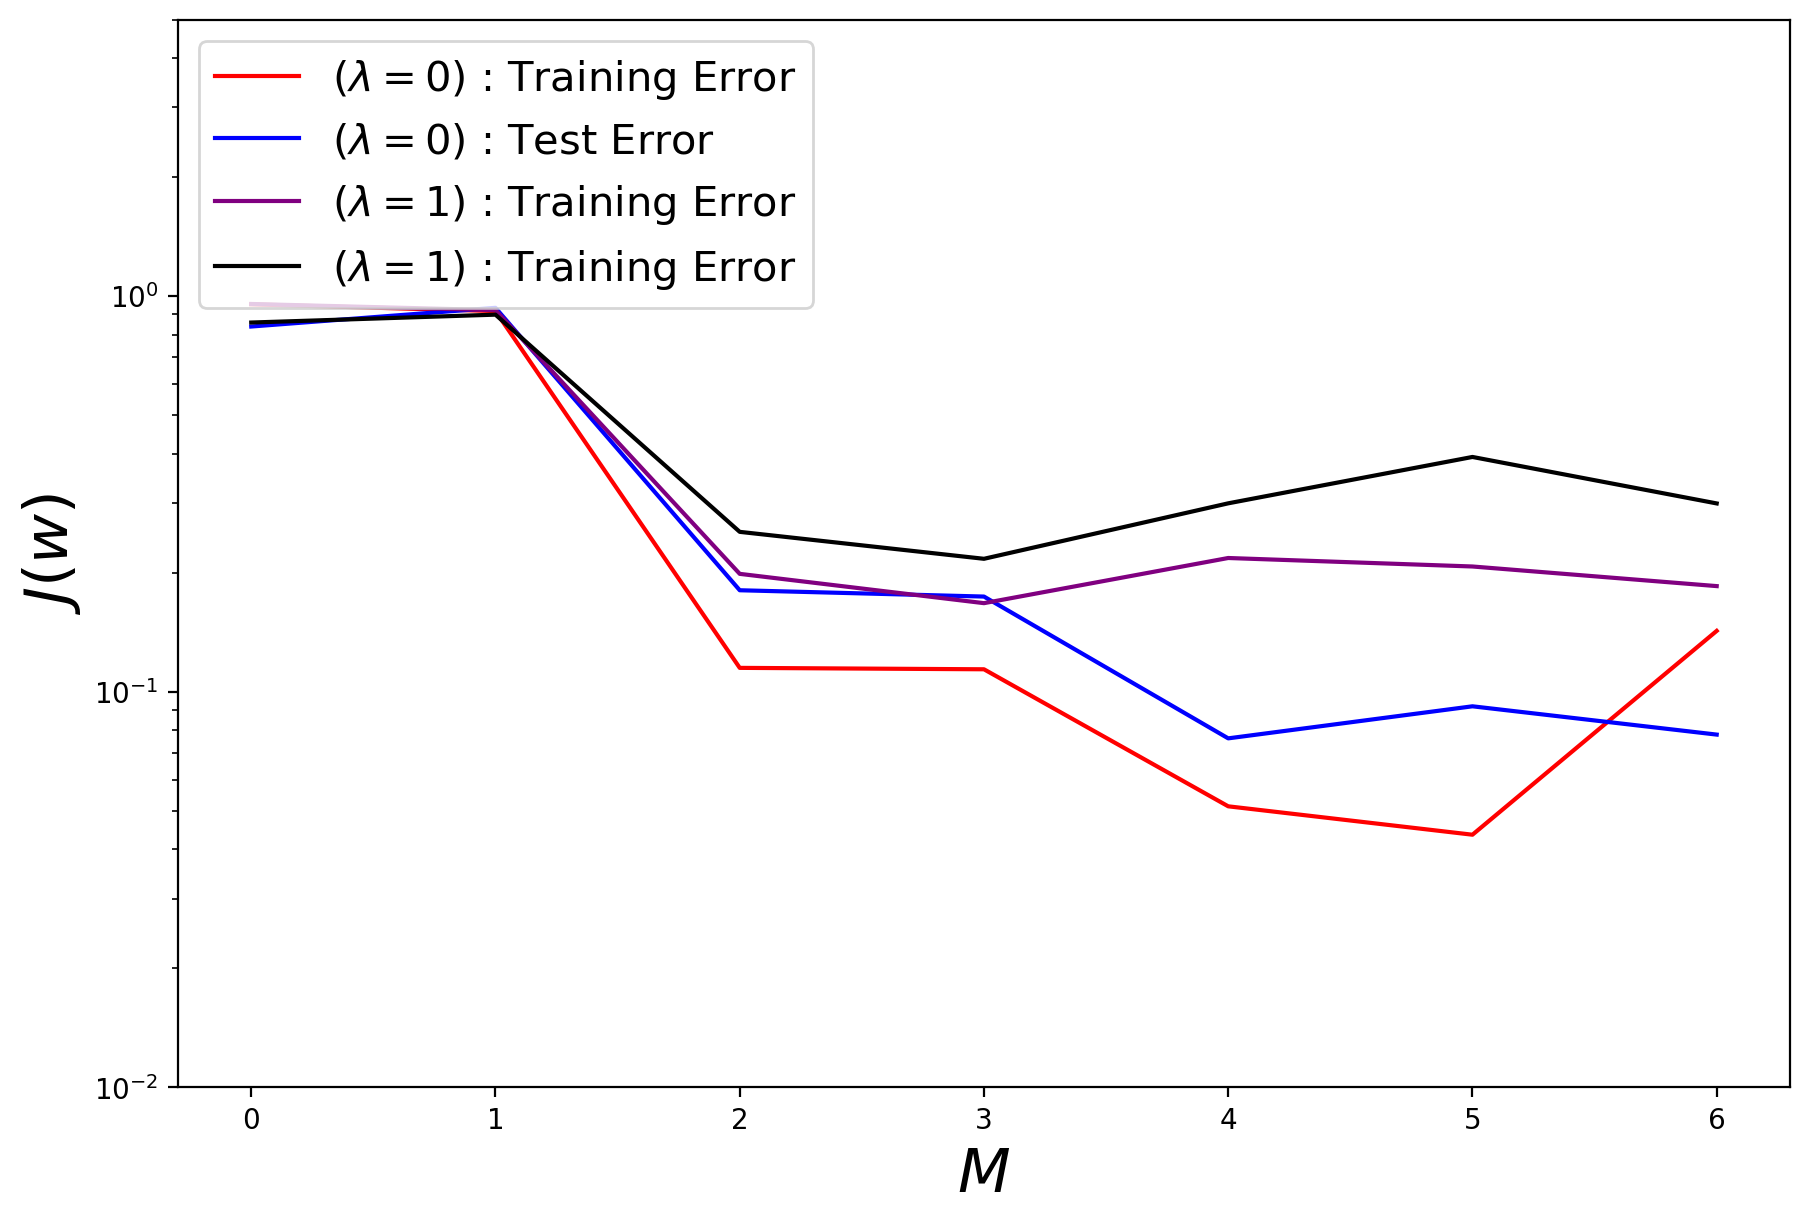

In [80]:
x_m = [i for i in range(len(errors_train))]

plt.figure(figsize=(16*scale_factor,10.667*scale_factor))
plt.plot(x_m, errors_train, c='red', label='$(\lambda=0)$ : Training Error')
plt.plot(x_m, errors_test, c='blue', label='$(\lambda=0)$ : Test Error')
plt.plot(x_m, errors_train_reg, c='purple', label='$(\lambda=1)$ : Training Error')
plt.plot(x_m, errors_test_reg, c='black', label='$(\lambda=1)$ : Training Error')
plt.legend(loc="upper left", fontsize=15)
plt.yscale('log')
plt.xlabel('$M$', fontsize=22)
plt.ylabel('$J(w)$', fontsize=22)
plt.ylim(0.01,5)

In [114]:
print('(No regularization, λ=0) M = {}'.format(int(np.argmin(errors_train))+1))

(No regularization, λ=0) M = 6


In [118]:
print('(No regularization, λ=1) M = {}'.format(int(np.argmin(errors_train_reg))+1))

(No regularization, λ=1) M = 4
